In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from SqlAlquemySelectDataHandler import SqlAlquemySelectDataHandler

from dotenv import load_dotenv
load_dotenv()

True

In [2]:
# Selected 27 most important countries that covers
# around 98% of total weight of MSCI ACWI in years 1999 - 2024

selected_countries = [
    'United States', 'Japan', 'United Kingdom',
    'Canada', 'France', 'Switzerland', 'Germany',
    'Australia', 'Netherlands', 'Sweden',
    'Hong Kong', 'Spain', 'Italy',
    'Singapore', 'Denmark', 'Finland',
    'Belgium', 'Norway', 'China', 'Taiwan',
    'India', 'Korea', 'Brazil', 'Russia',
    'South Africa', 'Mexico', 'Malaysia', 'ACWI']
len(selected_countries)

28

### ETF data in USD from Nasdaq exchange which have the highest coverage

In [3]:
sql_handler = SqlAlquemySelectDataHandler()
etfs_in_usd = sql_handler.read_market_symbols('ETF in USD')

In [4]:
etfs = etfs_in_usd.loc[selected_countries]
etfs

,Code,Description
United States,SPY,SPDR S&P 500 ETF Trust (SPY)
Japan,EWJ,iShares MSCI Japan ETF
United Kingdom,EWU,iShares MSCI United Kingdom ETF
Canada,EWC,iShares MSCI Canada ETF
France,EWQ,iShares MSCI France ETF
Switzerland,EWL,iShares MSCI Switzerland ETF
Germany,EWG,iShares MSCI Germany ETF
Australia,EWA,iShares MSCI Australia ETF
Netherlands,EWN,iShares MSCI Neatherlands ETF
Sweden,EWD,iShares MSCI Sweden ETF


In [5]:
df_etfs = pd.DataFrame(index=pd.date_range('1999-01-04', '2023-12-29', freq='B'),
                       columns=selected_countries)

for country in selected_countries:
    symbol = etfs.loc[country]['Code']
    df_etfs.loc[:, country] = sql_handler.read_market_data(symbol)

6325 market data read
6325 market data read
6325 market data read
6325 market data read
6325 market data read
6325 market data read
6325 market data read
6325 market data read
6325 market data read
6325 market data read
6325 market data read
6325 market data read
6325 market data read
6325 market data read
3038 market data read
3038 market data read
6325 market data read
3037 market data read
3245 market data read
5953 market data read
3032 market data read
5982 market data read
5939 market data read
3343 market data read
5296 market data read
6325 market data read
6325 market data read
4001 market data read


In [6]:
df_etfs = df_etfs.astype(float).round(2)
df_etfs

,United States,Japan,United Kingdom,Canada,France,Switzerland,Germany,Australia,Netherlands,Sweden,...,China,Taiwan,India,Korea,Brazil,Russia,South Africa,Mexico,Malaysia,ACWI
1999-01-04,78.57,28.45,16.07,5.85,11.39,11.48,12.74,3.45,14.50,7.73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.28,4.77,NaN
1999-01-05,79.47,28.28,16.21,5.94,11.45,11.64,12.61,3.45,14.70,7.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.32,4.95,NaN
1999-01-06,81.39,28.63,16.90,6.28,11.70,11.89,13.62,3.56,14.97,7.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.20,5.29,NaN
1999-01-07,80.99,28.80,16.60,6.19,11.61,11.81,12.68,3.63,14.53,8.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.13,5.21,NaN
1999-01-08,81.59,28.80,16.51,6.28,11.42,11.81,12.71,3.63,14.36,7.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.93,5.73,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,473.65,63.33,32.92,36.43,39.13,47.45,29.52,24.24,44.25,39.43,...,39.29,44.47,48.36,63.97,34.62,8.06,40.75,67.81,21.16,NaN
2023-12-26,475.65,63.31,33.09,36.83,39.37,47.70,29.69,24.44,44.66,39.60,...,39.57,45.41,48.53,64.27,35.15,8.06,40.97,68.31,21.11,101.67
2023-12-27,476.51,63.66,33.22,36.87,39.51,48.07,29.86,24.56,44.87,39.93,...,39.53,45.86,48.84,64.85,35.27,8.06,41.97,68.46,21.16,101.96
2023-12-28,476.69,64.04,33.05,36.70,39.13,47.86,29.66,24.49,44.64,39.75,...,40.46,46.03,49.02,65.98,35.11,8.06,40.94,67.96,21.21,101.96


In [7]:
def z_score_scaler(x): return (x - x.mean()) / x.std()

df_etfs_norm = df_etfs.apply(z_score_scaler)
df_etfs_norm = df_etfs_norm.round(2)
df_etfs_norm

,United States,Japan,United Kingdom,Canada,France,Switzerland,Germany,Australia,Netherlands,Sweden,...,China,Taiwan,India,Korea,Brazil,Russia,South Africa,Mexico,Malaysia,ACWI
1999-01-04,-0.78,-1.10,-1.02,-1.66,-1.13,-0.93,-0.86,-1.50,-0.59,-1.23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.74,-1.81,NaN
1999-01-05,-0.77,-1.11,-1.00,-1.65,-1.12,-0.91,-0.88,-1.50,-0.57,-1.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.73,-1.79,NaN
1999-01-06,-0.75,-1.08,-0.88,-1.61,-1.09,-0.89,-0.73,-1.48,-0.54,-1.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.74,-1.75,NaN
1999-01-07,-0.76,-1.07,-0.93,-1.62,-1.10,-0.90,-0.87,-1.47,-0.59,-1.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.75,-1.76,NaN
1999-01-08,-0.75,-1.07,-0.95,-1.61,-1.13,-0.90,-0.86,-1.47,-0.60,-1.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.76,-1.69,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,2.74,1.95,1.81,1.96,2.58,2.17,1.61,1.89,2.33,2.01,...,-0.79,1.92,2.21,1.07,0.80,-1.97,0.51,2.04,0.24,NaN
2023-12-26,2.75,1.95,1.84,2.01,2.61,2.19,1.63,1.92,2.37,2.02,...,-0.77,2.00,2.24,1.09,0.85,-1.97,0.53,2.07,0.23,2.08
2023-12-27,2.76,1.98,1.86,2.02,2.63,2.22,1.66,1.94,2.39,2.06,...,-0.77,2.04,2.27,1.12,0.86,-1.97,0.62,2.08,0.24,2.10
2023-12-28,2.76,2.01,1.83,2.00,2.58,2.20,1.63,1.93,2.37,2.04,...,-0.69,2.05,2.30,1.18,0.85,-1.97,0.52,2.05,0.24,2.10


In [8]:
for country in df_etfs.columns:
    first_valid = df_etfs[country].first_valid_index()
    if not str(first_valid).startswith('1999-01-04'):
        print(country, first_valid)

Denmark 2012-01-26 00:00:00
Finland 2012-01-26 00:00:00
Norway 2012-01-24 00:00:00
China 2011-03-31 00:00:00
Taiwan 2000-06-23 00:00:00
India 2012-02-03 00:00:00
Korea 2000-05-12 00:00:00
Brazil 2000-07-14 00:00:00
Russia 2010-11-09 00:00:00
South Africa 2003-02-07 00:00:00
ACWI 2008-03-28 00:00:00


10 countries and ACWI index have incomplete ETF data

In [9]:
for country in df_etfs.columns:
    last_valid = df_etfs[country].last_valid_index()
    if not str(last_valid).startswith('2023-12-29'):
        print(country, last_valid)

### Stock indices for missing data

In [10]:
# Hang Seng is much more similar to MSCI China ETF than Shanghai composite

stock_indices = sql_handler.read_market_symbols('Stock Index')
stock_indices = stock_indices.loc[
    ['Taiwan', 'India', 'Korea', 'Brazil', 'Russia', 'Hong Kong',
     'Denmark', 'Finland', 'Norway', 'South Africa']]
stock_indices

,Code,Description
Taiwan,^TWII,TSEC Weighted
India,^BSESN,S&P BSE Sensex
Korea,^KS11,KOSPI
Brazil,^BVSP,BOVESPA
Russia,IMOEX.ME,MOEX
Hong Kong,^HSI,Hang Seng
Denmark,OMXC20,OMX Copenhagen 20
Finland,^OMXH25,OMX Helsinki 25
Norway,OBX,Olso OBX
South Africa,JTOPI,FTSE JSE 40


In [11]:
df_stock_indices = pd.DataFrame(index=pd.date_range('1999-01-04', '2023-12-29', freq='B'),
                                columns=stock_indices.index)

for country in stock_indices.index:
    symbol = stock_indices.loc[country]['Code']
    df_stock_indices.loc[:, country] = sql_handler.read_market_data(symbol)

6552 market data read
6552 market data read
6552 market data read
6552 market data read
6552 market data read
6552 market data read
6003 market data read
5984 market data read
6376 market data read
6552 market data read


In [12]:
df_stock_indices = df_stock_indices.astype(float).round(2)
df_stock_indices

,Taiwan,India,Korea,Brazil,Russia,Hong Kong,Denmark,Finland,Norway,South Africa
1999-01-04,6152.41,3122.04,587.57,6942.0,45.60,9809.17,NaN,NaN,NaN,4542.55
1999-01-05,6152.41,3149.06,576.78,7111.0,45.60,9891.06,NaN,NaN,NaN,4565.49
1999-01-06,6199.89,3205.68,612.36,7331.0,46.79,10233.80,NaN,NaN,NaN,4822.16
1999-01-07,6404.29,3299.09,637.59,6954.0,46.79,10693.57,NaN,NaN,NaN,4866.61
1999-01-08,6421.73,3397.84,626.33,6781.0,46.79,10722.70,NaN,NaN,NaN,4957.42
...,...,...,...,...,...,...,...,...,...,...
2023-12-25,17604.84,71106.96,2599.51,132753.0,3092.58,16340.41,2267.75,4521.38,1185.04,67966.89
2023-12-26,17751.73,71336.80,2602.59,133533.0,3094.72,16624.84,2266.57,4545.88,1185.04,67966.89
2023-12-27,17891.50,72038.43,2613.50,134194.0,3097.49,16624.84,2266.57,4545.88,1193.95,70273.03
2023-12-28,17910.37,72410.38,2655.28,134185.0,3101.99,17043.53,2283.04,4529.24,1191.90,70076.25


In [13]:
for country in df_stock_indices.columns:
    first_valid = df_stock_indices[country].first_valid_index()
    if not str(first_valid).startswith('1999-01-04'):
        print(country, first_valid)

Denmark 2001-02-09 00:00:00
Finland 2001-03-08 00:00:00
Norway 1999-09-07 00:00:00


In [14]:
for country in df_stock_indices.columns:
    last_valid = df_stock_indices[country].last_valid_index()
    if not str(last_valid).startswith('2023-12-29'):
        print(country, last_valid)

### Currency rates to adjust convert indexes to USD

In [15]:
currency_rates_usd = sql_handler.read_market_symbols('Currency Rate USD')
currency_rates_usd

,Code,Description
Brazil,BRLUSD=X,Brazilian Real
Denmark,DKKUSD=X,Danish Krone
Hong Kong,HKDUSD=X,Hong Kong Dollar
India,INRUSD=X,Indian Rupee
Korea,KRWUSD=X,South Korean Won
Norway,NOKUSD=X,Norwegian Krone
Russia,RUBUSD=X,Russian Ruble
Taiwan,TWDUSD=X,New Taiwan Dollar
South Africa,ZARUSD=X,South African Rand


In [16]:
df_currency_rates = pd.DataFrame(index=pd.date_range('1999-01-04', '2023-12-29', freq='B'),
                                 columns=currency_rates_usd.index)

for country in currency_rates_usd.index:
    symbol = currency_rates_usd.loc[country]['Code']
    df_currency_rates.loc[:, country] = sql_handler.read_market_data(symbol)

df_currency_rates.loc[:, 'Finland'] = sql_handler.read_market_data('EURUSD=X')
df_currency_rates = df_currency_rates.astype(float)
df_currency_rates

6555 market data read
6555 market data read
6555 market data read
6555 market data read
6555 market data read
6555 market data read
6555 market data read
6555 market data read
6555 market data read
6555 market data read


,Brazil,Denmark,Hong Kong,India,Korea,Norway,Russia,Taiwan,South Africa,Finland
1999-01-04,0.8283,0.1588,0.1291,0.0219,0.0008,0.1339,0.0466,0.0312,0.1705,1.1827
1999-01-05,0.8278,0.1580,0.1291,0.0219,0.0008,0.1347,0.0440,0.0312,0.1734,1.1764
1999-01-06,0.8272,0.1560,0.1291,0.0219,0.0008,0.1342,0.0430,0.0312,0.1759,1.1618
1999-01-07,0.8263,0.1573,0.1291,0.0219,0.0008,0.1359,0.0432,0.0312,0.1733,1.1709
1999-01-08,0.8263,0.1555,0.1291,0.0219,0.0008,0.1353,0.0428,0.0312,0.1713,1.1575
...,...,...,...,...,...,...,...,...,...,...
2023-12-25,0.2053,0.1478,0.1280,0.0120,0.0008,0.0983,0.0109,0.0322,0.0542,1.1000
2023-12-26,0.2053,0.1478,0.1280,0.0120,0.0008,0.0983,0.0109,0.0321,0.0542,1.1000
2023-12-27,0.2077,0.1481,0.1281,0.0120,0.0008,0.0987,0.0109,0.0323,0.0536,1.1000
2023-12-28,0.2072,0.1490,0.1280,0.0120,0.0008,0.0990,0.0109,0.0324,0.0545,1.1100


### MSCI indexes for missing ETF data

In [17]:
msci_indices = sql_handler.read_market_symbols('MSCI Index')
msci_indices

,Code,Description
ACWI,MSCI_ACWI,MSCI ACWI Standard (Large+Mid Cap)
Brazil,MSCI_BRA,MSCI Brazil Standard (Large+Mid Cap)
China,MSCI_CHI,MSCI China Standard (Large+Mid Cap)
Denmark,MSCI_DEN,MSCI Denmark Standard (Large+Mid Cap)
Finland,MSCI_FIN,MSCI Finland Standard (Large+Mid Cap)
India,MSCI_IND,MSCI India Standard (Large+Mid Cap)
Korea,MSCI_KOR,MSCI Korea Standard (Large+Mid Cap)
Norway,MSCI_NOR,MSCI Norway Standard (Large+Mid Cap)
South Africa,MSCI_SA,MSCI South Africa Standard (Large+Mid Cap)
Taiwan,MSCI_TAI,MSCI Taiwan Standard (Large+Mid Cap)


In [18]:
df_msci_indices = pd.DataFrame(index=pd.date_range('1999-01-04', '2023-12-29', freq='B'),
                               columns=msci_indices.index)

for country in msci_indices.index:
    symbol = msci_indices.loc[country]['Code']
    df_msci_indices.loc[:, country] = sql_handler.read_market_data(symbol)

6521 market data read
6521 market data read
6521 market data read
6521 market data read
6521 market data read
6521 market data read
6521 market data read
6521 market data read
6521 market data read
6521 market data read


In [19]:
df_msci_indices = df_msci_indices.astype(float).round(2)
df_msci_indices

,ACWI,Brazil,China,Denmark,Finland,India,Korea,Norway,South Africa,Taiwan
1999-01-04,276.12,546.00,29.78,2000.72,456.04,82.22,88.74,1000.13,127.49,232.02
1999-01-05,278.92,549.24,29.46,1994.98,461.88,83.25,92.87,1016.82,130.77,221.98
1999-01-06,284.22,562.39,30.29,1985.66,459.39,84.91,95.44,1043.26,140.87,225.84
1999-01-07,283.46,541.31,30.97,1940.68,470.27,87.23,100.89,1026.77,137.94,234.80
1999-01-08,283.17,531.09,30.60,1917.44,468.74,90.01,95.97,1052.26,142.38,235.91
...,...,...,...,...,...,...,...,...,...,...
2023-12-25,721.30,1778.91,52.90,21617.38,504.50,905.53,491.61,2416.04,395.66,615.92
2023-12-26,723.78,1802.53,52.91,21646.80,505.14,909.55,496.52,2418.46,392.51,623.80
2023-12-27,727.29,1811.26,53.77,21782.83,511.53,914.81,501.07,2475.32,412.58,633.35
2023-12-28,728.75,1806.41,55.27,21948.23,509.83,922.07,511.08,2449.48,407.65,638.66


In [20]:
for country in df_msci_indices.columns:
    first_valid = df_msci_indices[country].first_valid_index()
    if not str(first_valid).startswith('1999-01-04'):
        print(country, first_valid)

In [21]:
for country in df_msci_indices.columns:
    last_valid = df_msci_indices[country].last_valid_index()
    if not str(last_valid).startswith('2023-12-29'):
        print(country, last_valid)

### Comparing tracking error between ETF and different indices

In [22]:
def compare_data_with_indices(country, norm_date):
    plt.figure(figsize=(20, 8))

    etf_norm = df_etfs_norm[country]
    plt.plot(etf_norm, label='ETF')

    plt.vlines(x=pd.to_datetime(norm_date),
               ymin=-3, ymax=3, color='b', linestyle='--',
               label='First valid ETF date')

    if country != 'ACWI':
        if country == 'China':
            index = df_stock_indices['Hong Kong']
            currency_rate = df_currency_rates['Hong Kong']
        else:
            index = df_stock_indices[country]
            currency_rate = df_currency_rates[country]

        index_adj = index*currency_rate
        index_adj_mean = index_adj[norm_date:].mean()
        index_adj_std = index_adj[norm_date:].std()
        index_adj_norm = (index_adj - index_adj_mean)/index_adj_std
        index_adj_norm = index_adj_norm.round(2)
        plt.plot(index_adj_norm, label='Stock Index currency adj')

        index_mean = index[norm_date:].mean()
        index_std = index[norm_date:].std()
        index_norm = (index - index_mean)/index_std
        index_norm = index_norm.round(2)
        plt.plot(index_norm, label='Stock Index original')

        tracking_error = np.std(index_adj_norm[norm_date:] - etf_norm)
    else:
        tracking_error = np.float32(9.99)

    if country != 'Russia':
        msci_index = df_msci_indices[country]
        msci_index_mean = msci_index[norm_date:].mean()
        msci_index_std = msci_index[norm_date:].std()
        msci_index_norm = (msci_index - msci_index_mean)/msci_index_std
        msci_index_norm = msci_index_norm.round(2)
        plt.plot(msci_index_norm, label='MSCI Index')

        msci_tracking_error = np.std(msci_index_norm[norm_date:] - etf_norm)
    else:
        msci_tracking_error = np.float32(9.99)

    plt.title(country)

    plt.legend()
    plt.show()

    print('Stock index tracking error:', tracking_error)
    print('MSCI tracking error:', msci_tracking_error)
    if tracking_error < msci_tracking_error:
        if (str(df_stock_indices[country].first_valid_index()).startswith('1999-01-04')):
            print('Better Stock index')
        else:
            print('Stock index misses start data - better MSCI index')
    else:
        print('Better MSCI index')

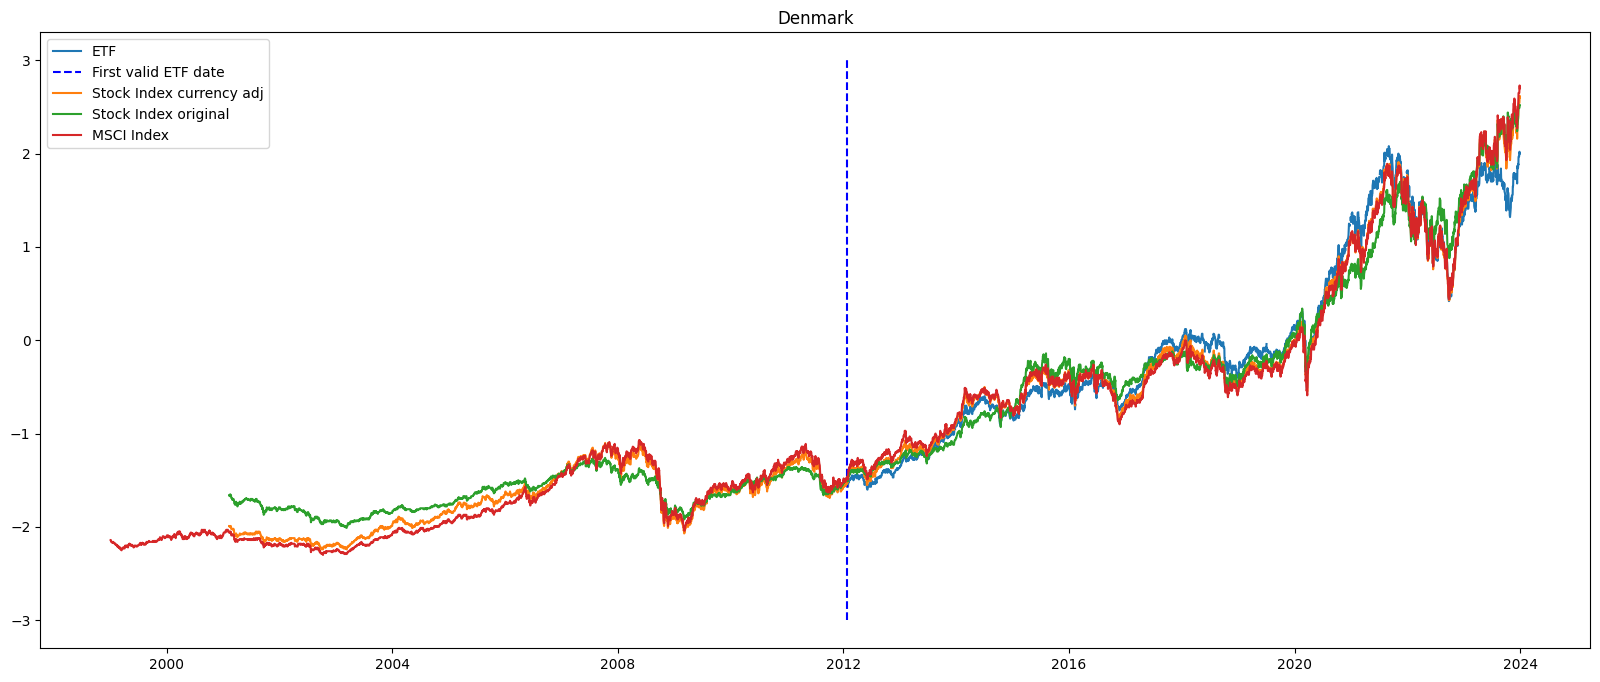

Stock index tracking error: 0.16373249774837073
MSCI tracking error: 0.20046385351921814
Stock index misses start data - better MSCI index


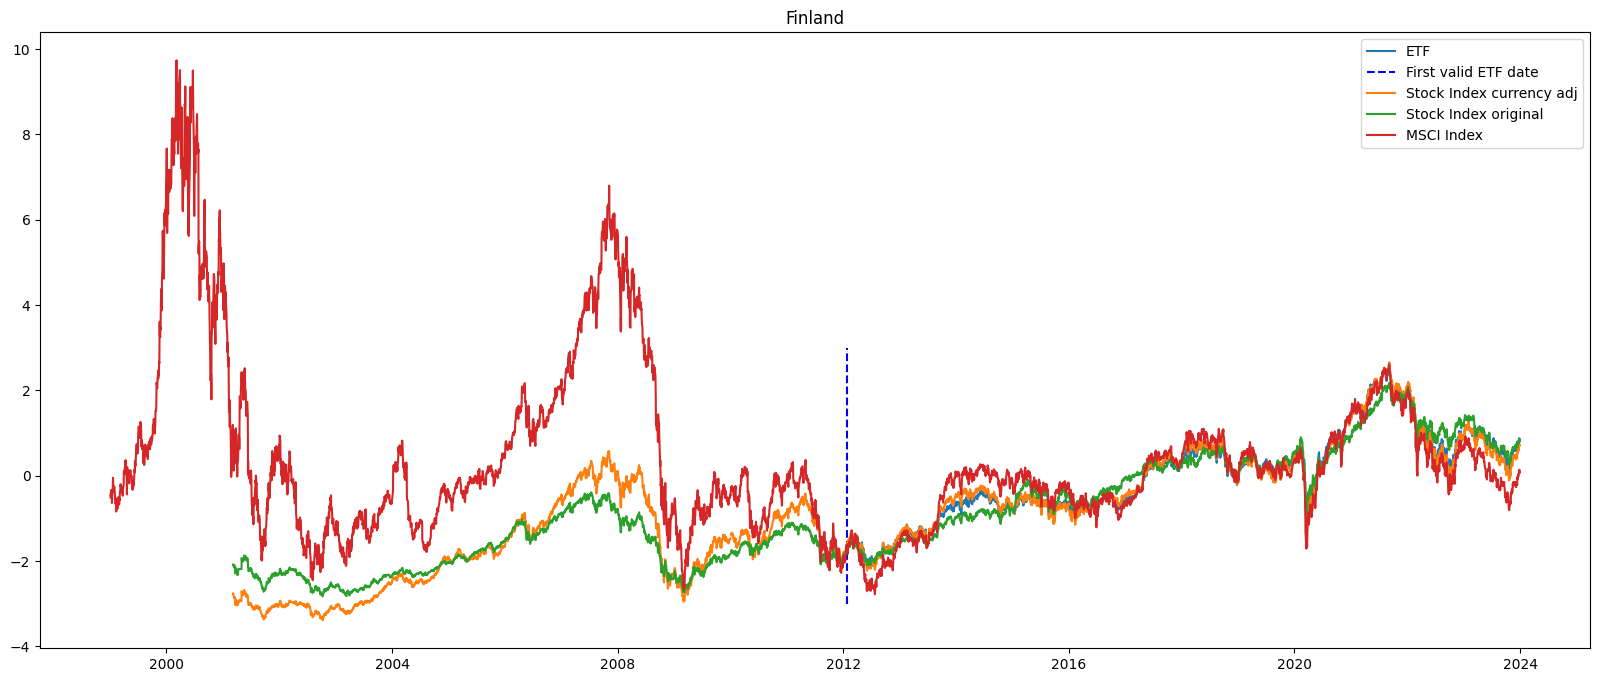

Stock index tracking error: 0.10966162373308912
MSCI tracking error: 0.3671323581630258
Stock index misses start data - better MSCI index


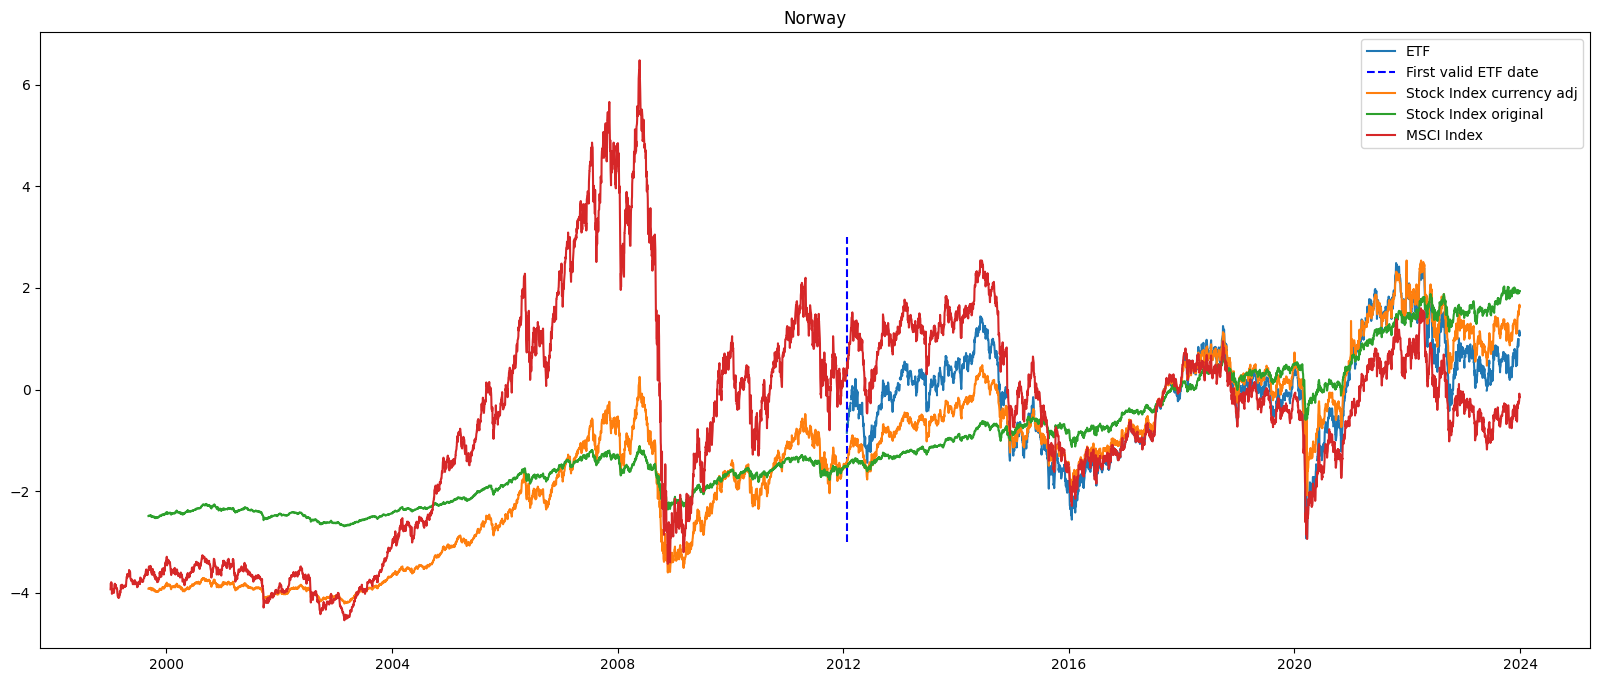

Stock index tracking error: 0.46823027747994794
MSCI tracking error: 0.7746090896481456
Stock index misses start data - better MSCI index


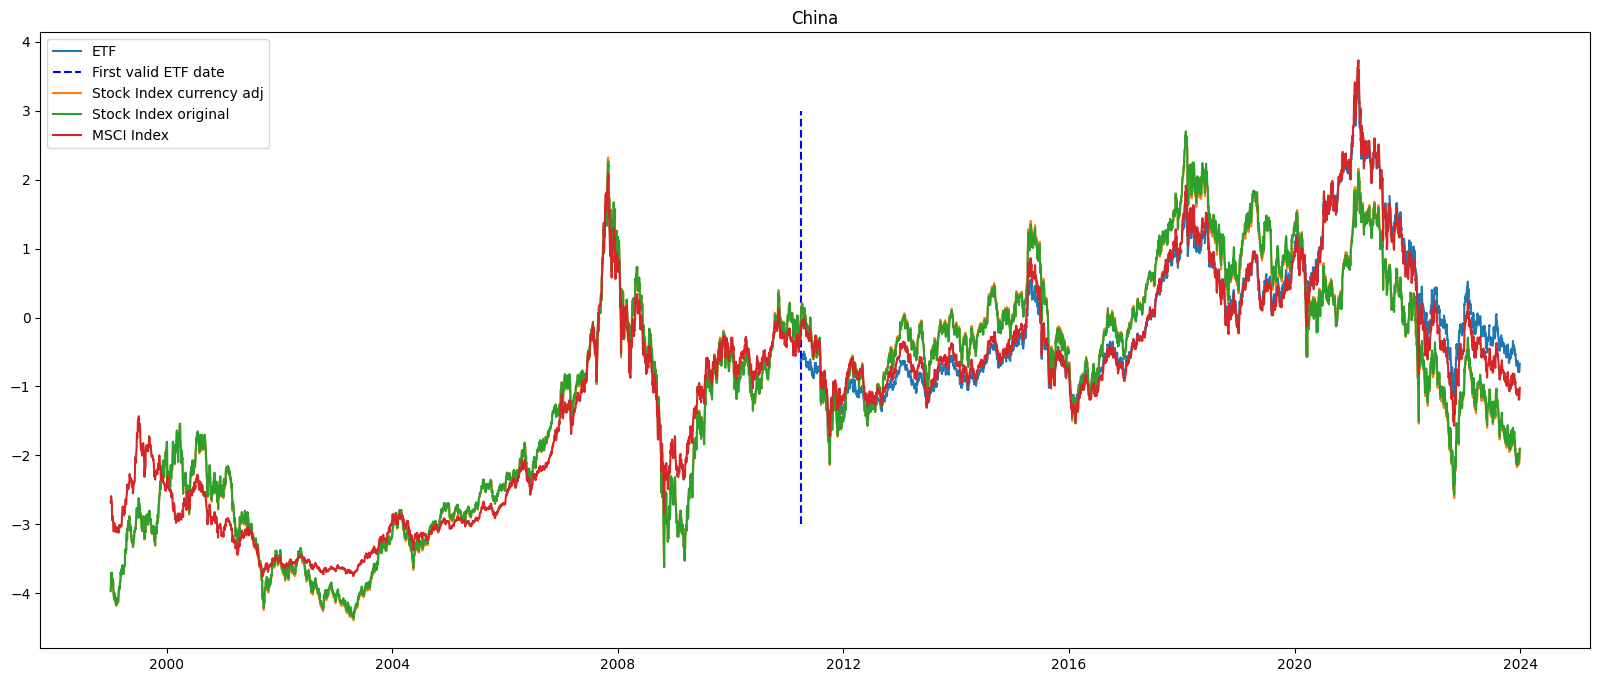

Stock index tracking error: 0.7302532471617272
MSCI tracking error: 0.1883795024119913
Better MSCI index


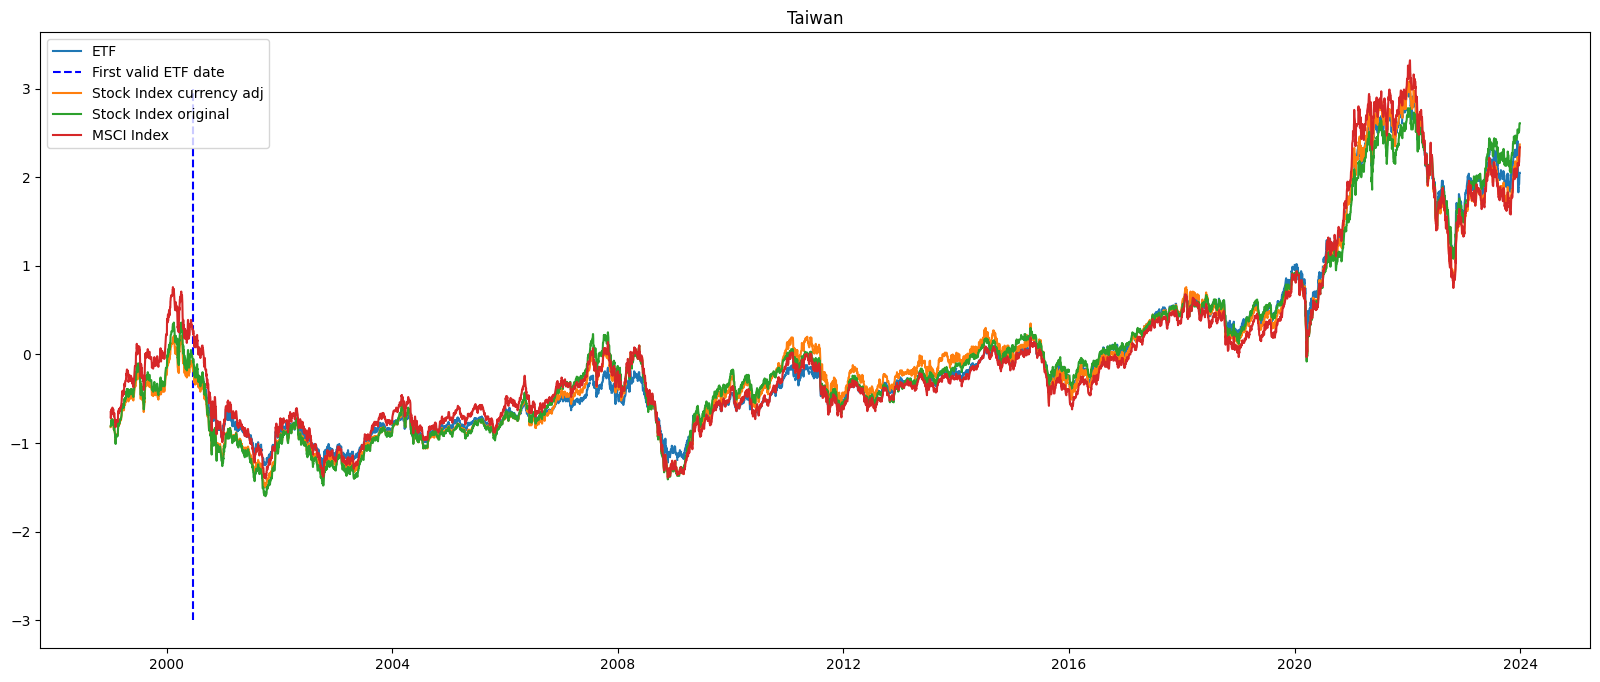

Stock index tracking error: 0.12445654289961772
MSCI tracking error: 0.13162243778883748
Better Stock index


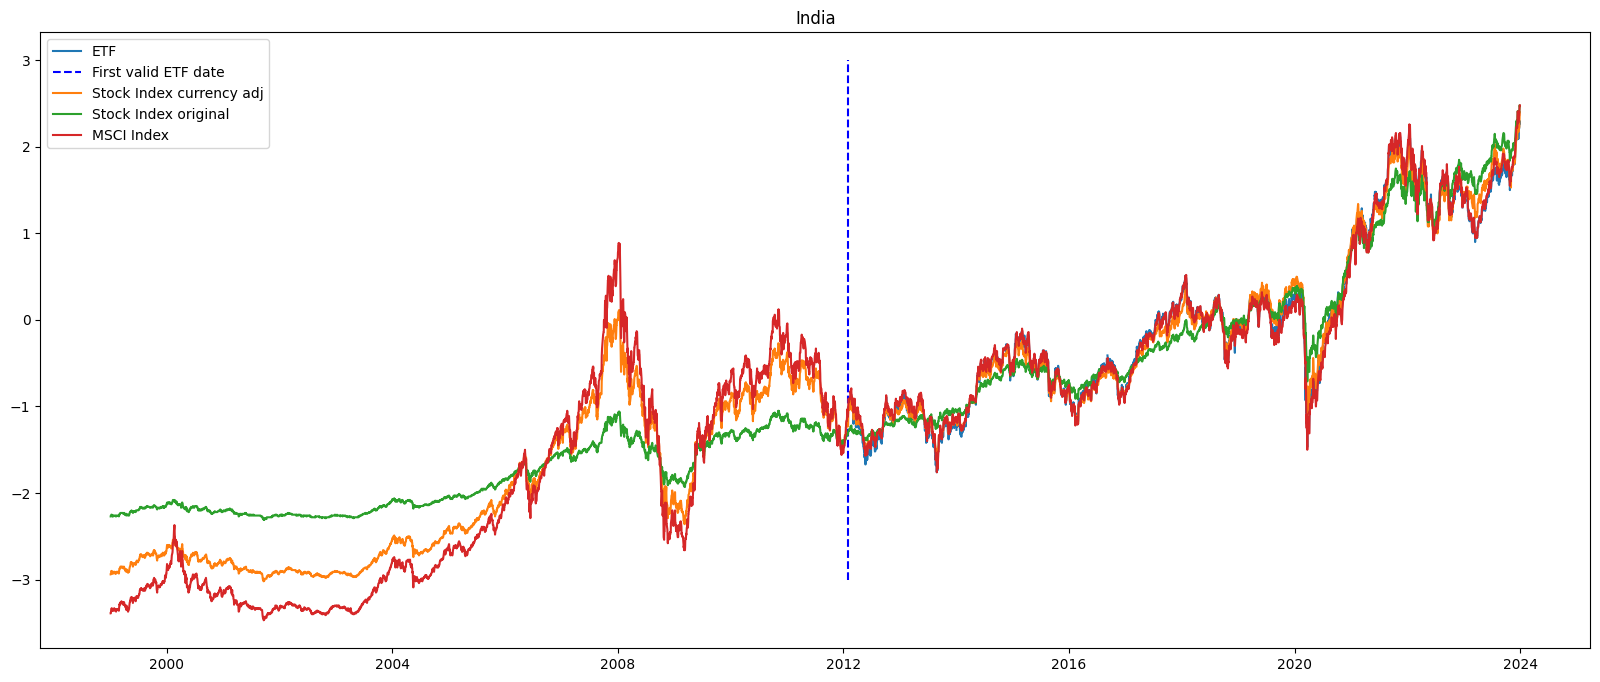

Stock index tracking error: 0.09983283539723732
MSCI tracking error: 0.062429165135166144
Better MSCI index


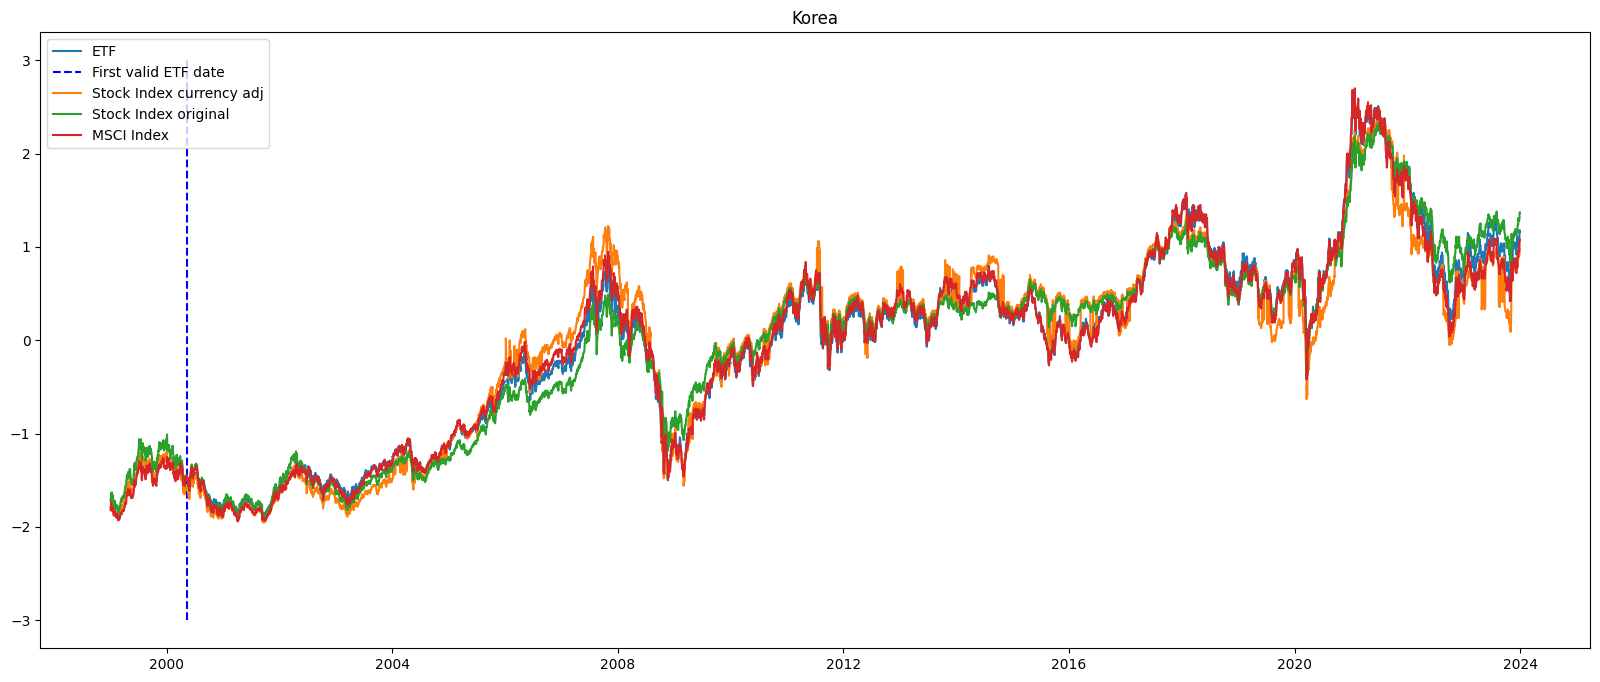

Stock index tracking error: 0.20299711212520927
MSCI tracking error: 0.07472597749115287
Better MSCI index


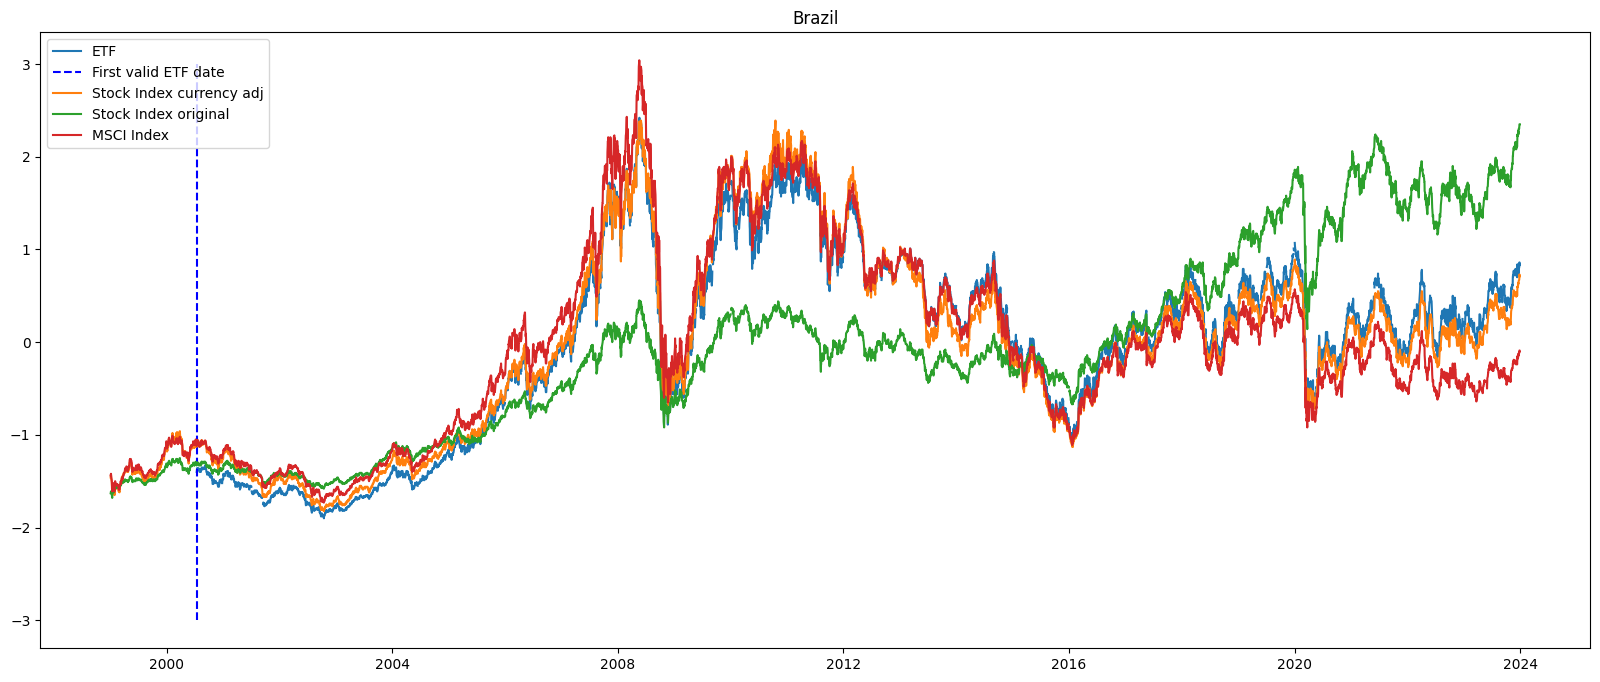

Stock index tracking error: 0.16138613387214243
MSCI tracking error: 0.3265485730859272
Better Stock index


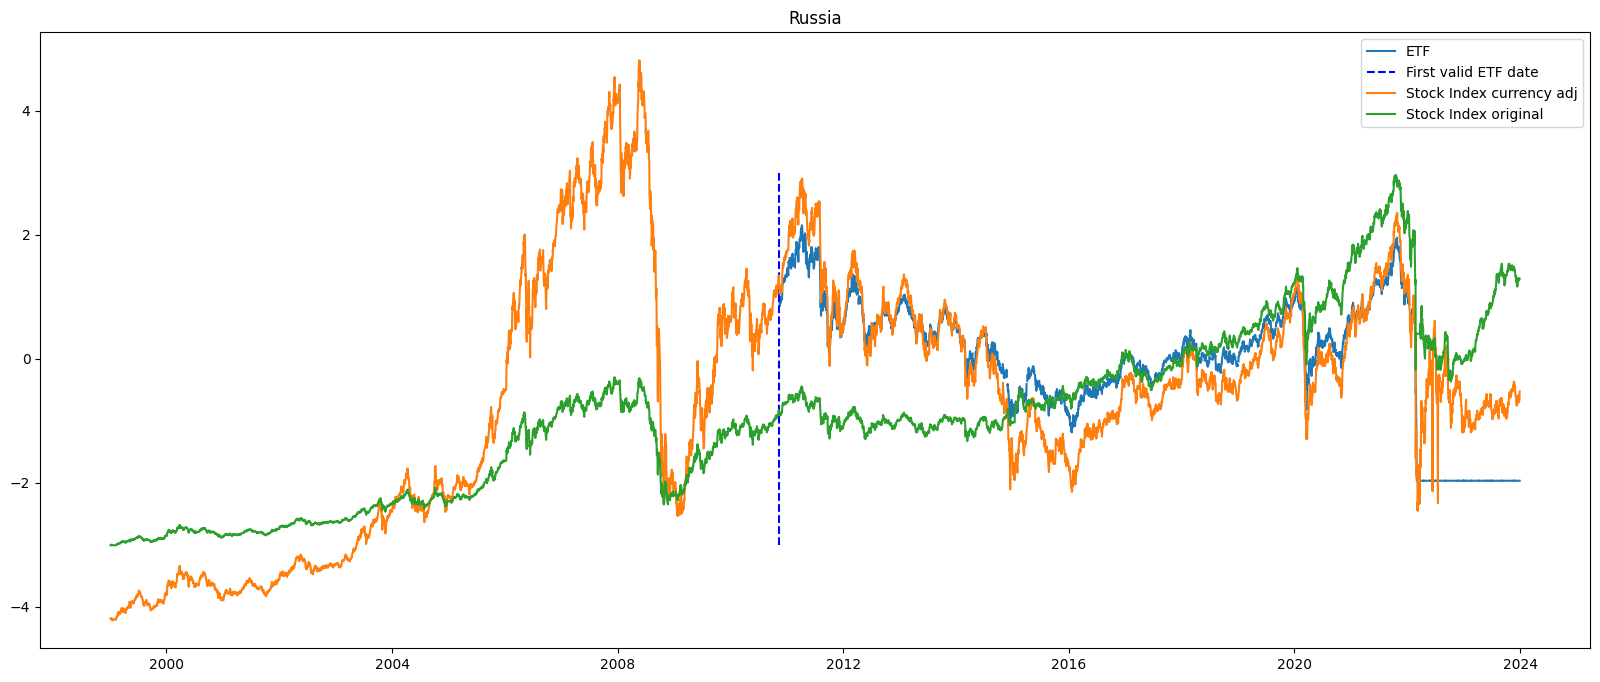

Stock index tracking error: 0.6309997013152406
MSCI tracking error: 9.99
Better Stock index


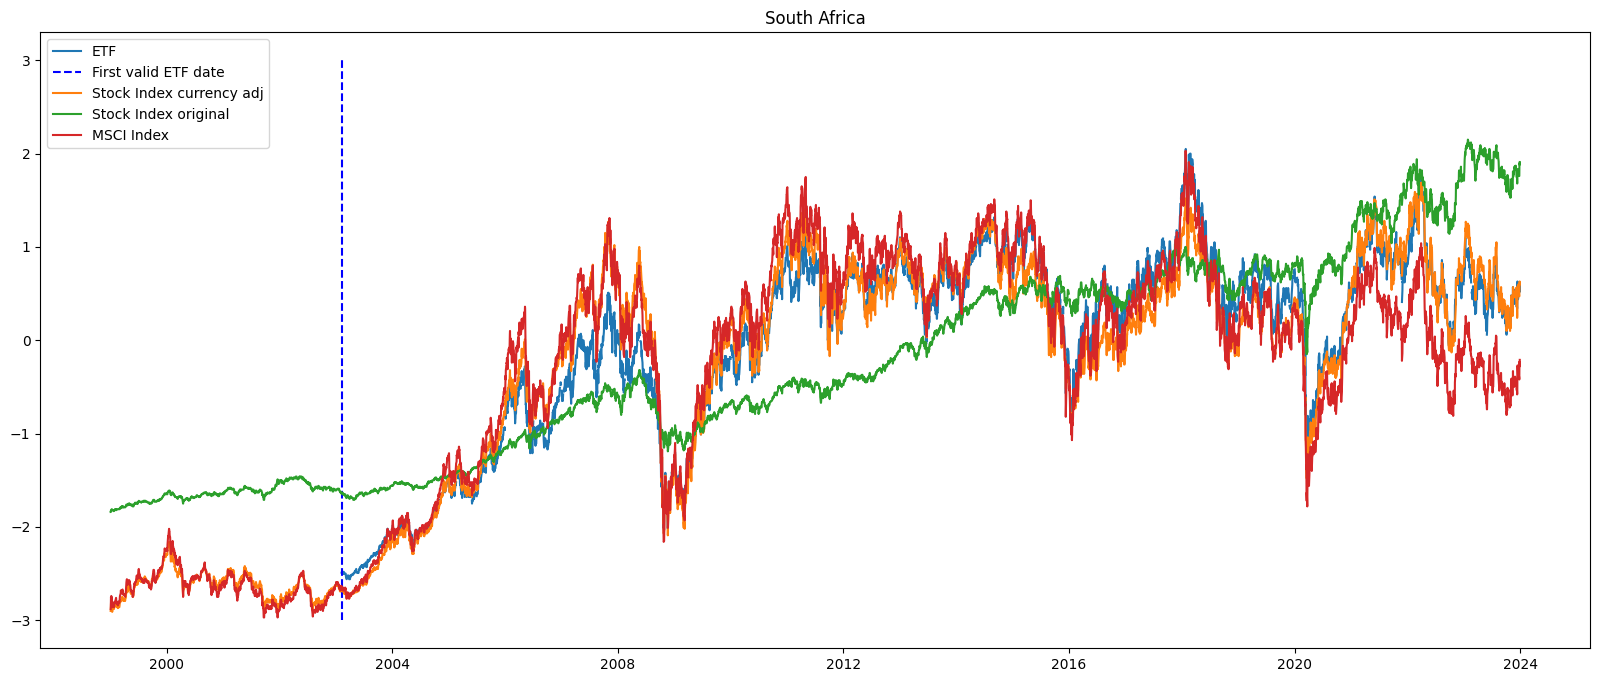

Stock index tracking error: 0.2812488586379918
MSCI tracking error: 0.3960068748716751
Better Stock index


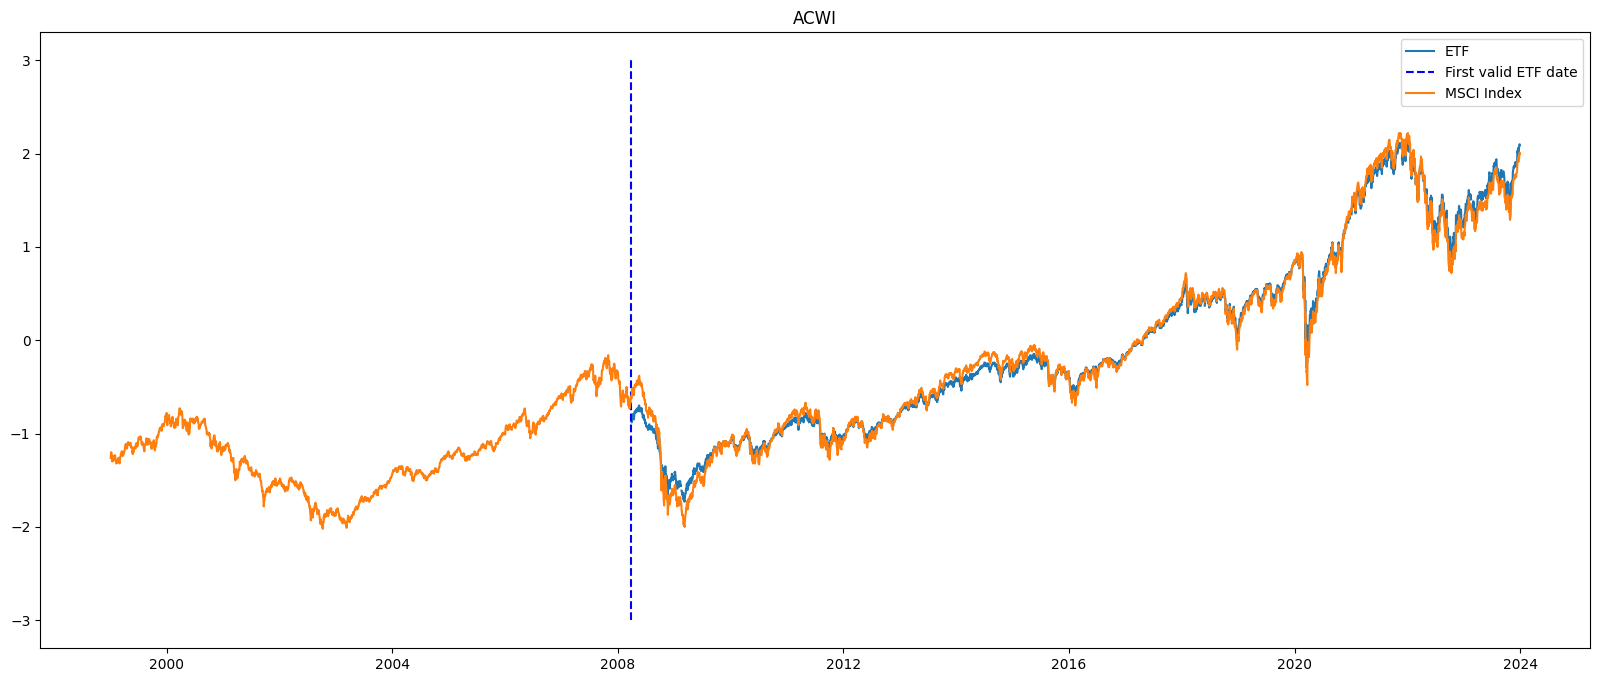

Stock index tracking error: 9.99
MSCI tracking error: 0.08424050102165392
Better MSCI index


In [23]:
for country in df_etfs.columns:
    first_valid = df_etfs[country].first_valid_index()
    if not str(first_valid).startswith('1999-01-04'):
        compare_data_with_indices(country, first_valid)

### Experimenting with different normalization and de-normalization methods to create synthetic ETFs

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\matplotlib\axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\matplotlib\axis.py:1495: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex wi

<Axes: >

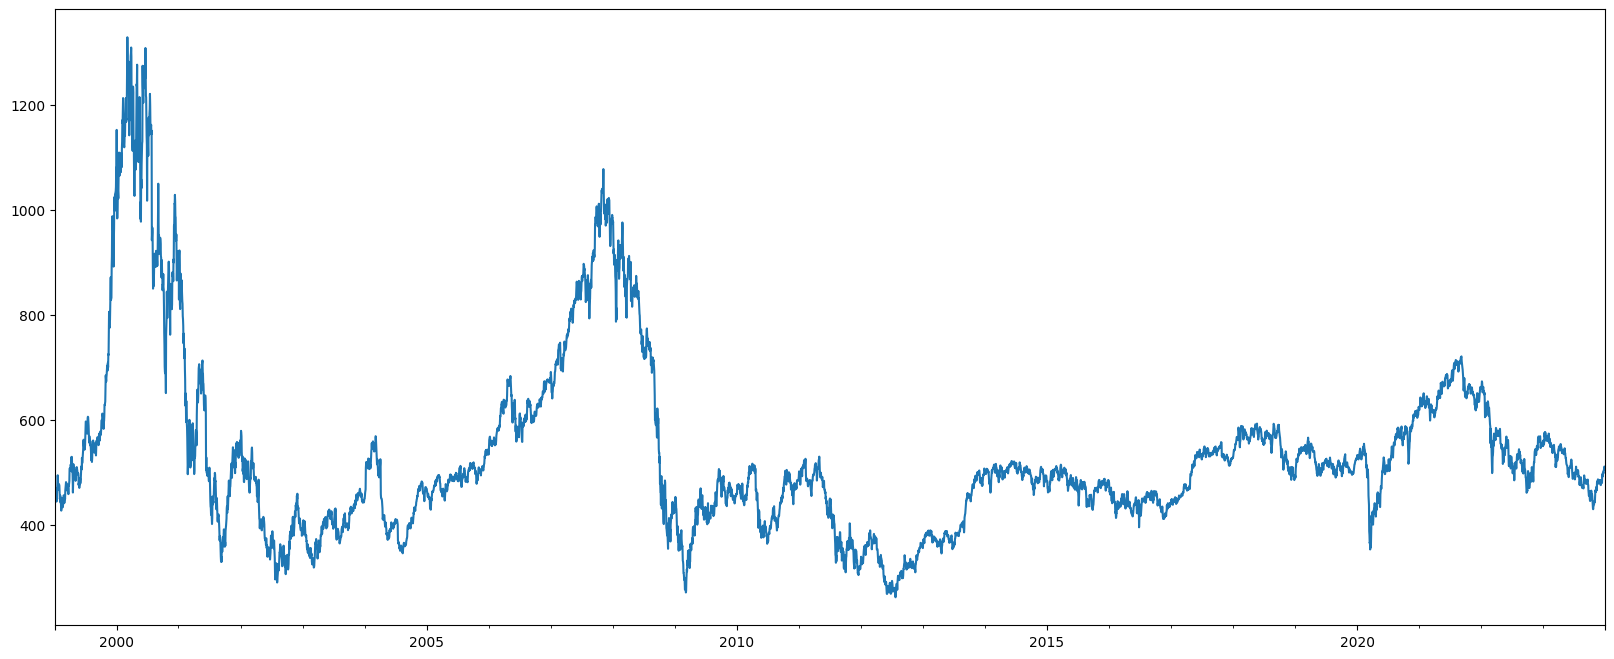

In [24]:
country = 'Finland'
msci_index = df_msci_indices[country]
msci_index.plot(figsize=(20,8))

In [25]:
max_idx = msci_index.argmax()
initial_gain = (msci_index.iloc[max_idx]/msci_index.iloc[0] * 100.0).round(2)
print('MSCI first year gain', initial_gain, '%')

MSCI first year gain 291.43 %


Z-score normalization

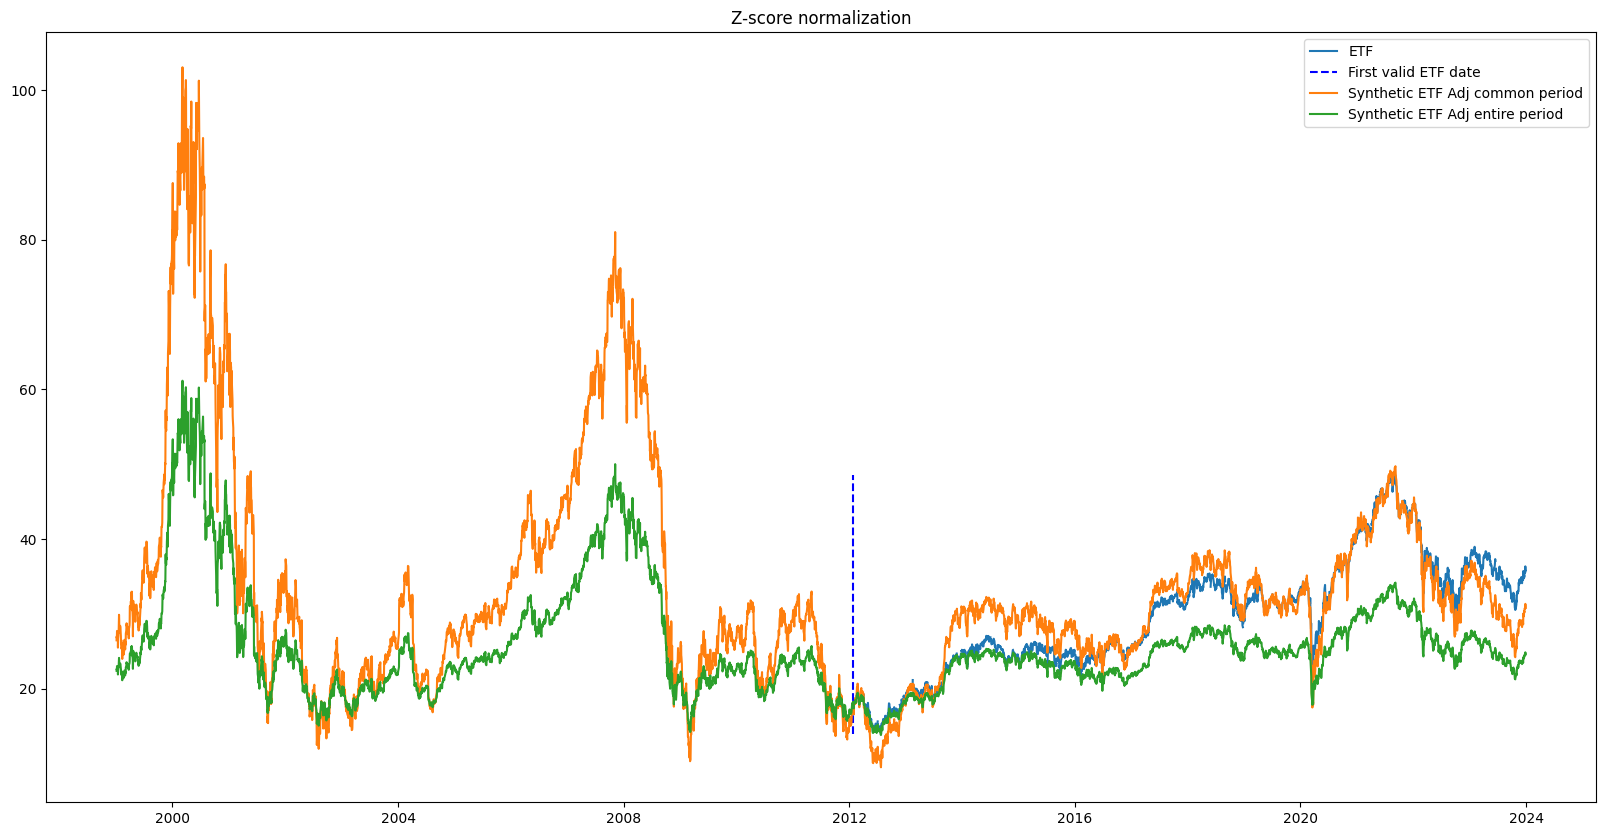

In [26]:
plt.figure(figsize=(20, 10))

etf = df_etfs[country]
plt.plot(etf, label='ETF')

first_valid = etf.first_valid_index().strftime('%Y-%m-%d')
etf_mean = etf.mean()
etf_std = etf.std()

plt.vlines(x=pd.to_datetime(first_valid),
            ymin=etf.min(), ymax=etf.max(), color='b', linestyle='--',
            label='First valid ETF date')

msci_index_mean = msci_index[first_valid:].mean()
msci_index_std = msci_index[first_valid:].std()
msci_index_norm = (msci_index - msci_index_mean)/msci_index_std

synthetic_etf = msci_index_norm * etf_std + etf_mean
synthetic_etf = synthetic_etf.round(2)
# plt.plot(synthetic_etf, label='Synthetic ETF common period')

diff = etf[first_valid] - synthetic_etf[first_valid]
synthetic_etf_adj_common = synthetic_etf + diff
plt.plot(synthetic_etf_adj_common, label='Synthetic ETF Adj common period')

msci_index = df_msci_indices[country]
msci_index_mean = msci_index.mean()
msci_index_std = msci_index.std()
msci_index_norm = (msci_index - msci_index_mean)/msci_index_std

synthetic_etf = msci_index_norm * etf_std + etf_mean
synthetic_etf = synthetic_etf.round(2)
# plt.plot(synthetic_etf, label='Synthetic ETF entire period')

diff = etf[first_valid] - synthetic_etf[first_valid]
synthetic_etf_adj = synthetic_etf + diff
plt.plot(synthetic_etf_adj, label='Synthetic ETF Adj entire period')

plt.title('Z-score normalization')
plt.legend()
plt.show()

In [27]:
print('Denormalized')
print('Values from', synthetic_etf_adj.min(), 'to', synthetic_etf_adj.max())
print('Maximum gain during the entire period',
      (synthetic_etf_adj.max()/synthetic_etf_adj.min()).round(2), 'x')
print()
print('Original')
print('Values from', msci_index.min(), 'to', msci_index.max())
print('Maximum gain during the entire period',
      (msci_index.max()/msci_index.min()).round(2), 'x')

Denormalized
Values from 13.809999999999999 to 61.16
Maximum gain during the entire period 4.43 x

Original
Values from 262.62 to 1329.04
Maximum gain during the entire period 5.06 x


Min-max normalization

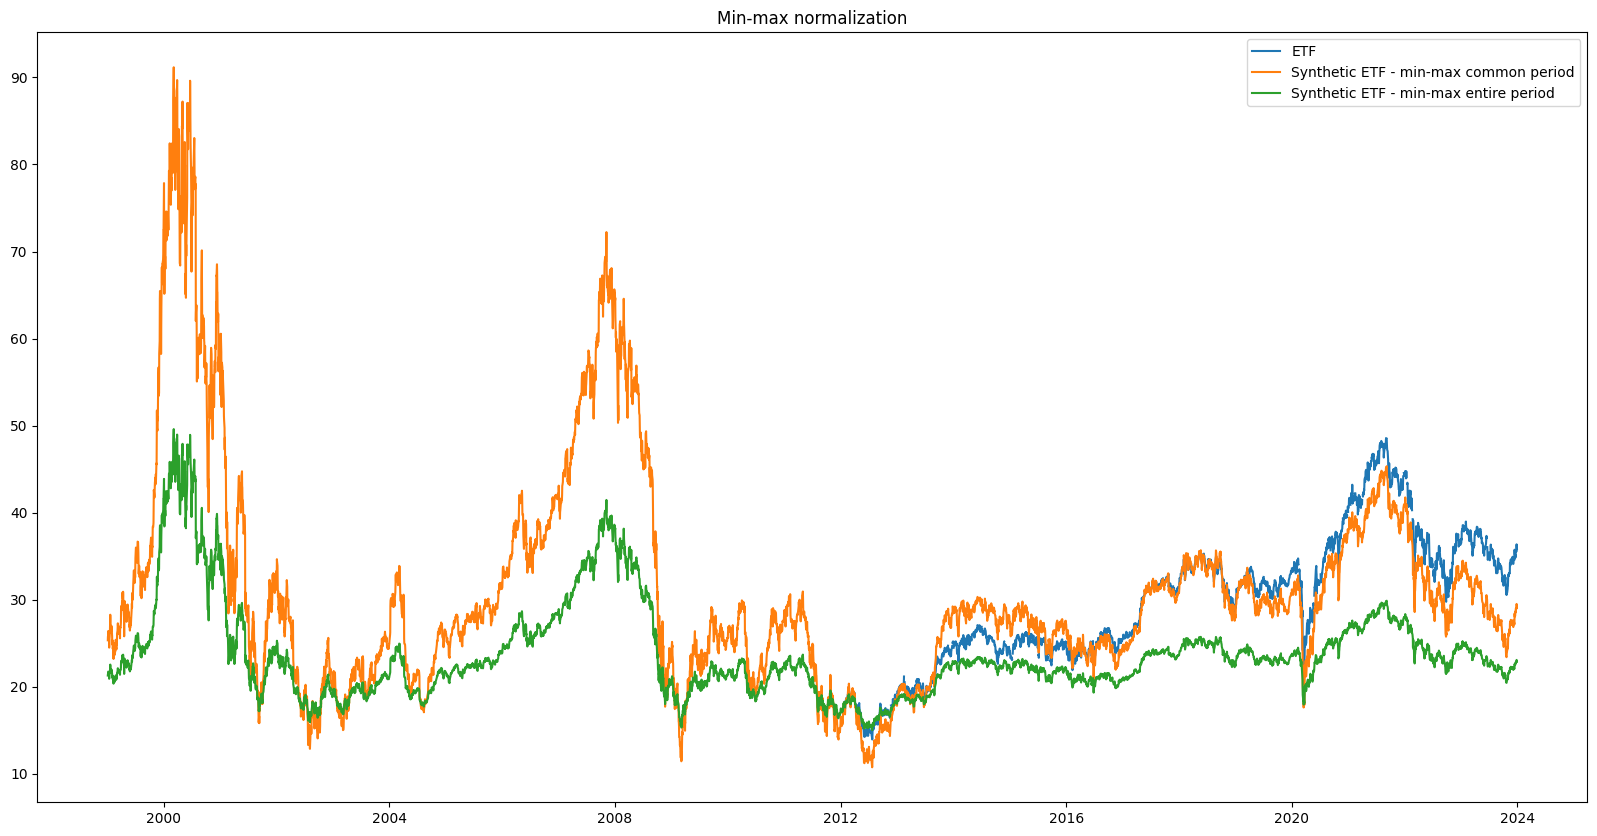

In [28]:
plt.figure(figsize=(20, 10))

etf = df_etfs[country]
plt.plot(etf, label='ETF')

first_valid = etf.first_valid_index().strftime('%Y-%m-%d')
etf_min = etf.min()
etf_max = etf.max()
etf_norm = (etf - etf_min)/(etf_max - etf_min)

msci_index_min = msci_index[first_valid:].min()
msci_index_max = msci_index[first_valid:].max()
msci_index_norm = (msci_index - msci_index_min)/(msci_index_max - msci_index_min)

synthetic_etf = msci_index_norm * (etf_max - etf_min) + etf_min
synthetic_etf = synthetic_etf.round(2)

diff = etf[first_valid] - synthetic_etf[first_valid]
synthetic_etf_adj_common_min_max = synthetic_etf + diff
plt.plot(synthetic_etf_adj_common_min_max, label='Synthetic ETF - min-max common period')

msci_index = df_msci_indices[country]
msci_index_min = msci_index.min()
msci_index_max = msci_index.max()
msci_index_norm = (msci_index - msci_index_min)/(msci_index_max - msci_index_min)

synthetic_etf = msci_index_norm * (etf_max - etf_min) + etf_min
synthetic_etf = synthetic_etf.round(2)

diff = etf[first_valid] - synthetic_etf[first_valid]
synthetic_etf_adj_min_max = synthetic_etf + diff
synthetic_etf_adj_min_max = synthetic_etf_adj_min_max.round(2)
plt.plot(synthetic_etf_adj_min_max, label='Synthetic ETF - min-max entire period')

plt.title('Min-max normalization')
plt.legend()
plt.show()

In [29]:
initial_gain = (msci_index.iloc[max_idx]/msci_index.iloc[0] * 100.0).round(2)
print('MSCI first year gain', initial_gain, '%')

initial_gain_common = (synthetic_etf_adj_common.iloc[max_idx]/synthetic_etf_adj_common.iloc[0] * 100.0).round(2)
print('Z-score common period, first year gain', initial_gain_common, '%')

initial_gain_entire = (synthetic_etf_adj.iloc[max_idx]/synthetic_etf_adj.iloc[0] * 100.0).round(2)
print('Z-score entire period, first year gain', initial_gain_entire, '%')

initial_gain_common_min_max = (synthetic_etf_adj_common_min_max.iloc[max_idx]/synthetic_etf_adj_common_min_max.iloc[0] * 100.0).round(2)
print('Min-max common period, first year gain', initial_gain_common_min_max, '%')

initial_gain_entire_min_max = (synthetic_etf_adj_min_max.iloc[max_idx]/synthetic_etf_adj_min_max.iloc[0] * 100.0).round(2)
print('Min-max entire period, first year gain', initial_gain_entire_min_max, '%')

MSCI first year gain 291.43 %
Z-score common period, first year gain 389.31 %
Z-score entire period, first year gain 273.04 %
Min-max common period, first year gain 360.07 %
Min-max entire period, first year gain 233.15 %


Results for synthetic ETF for Finland is one of the most ilustrative. When normalizing only on the common period after 2012, tracking error is pretty small, but for the initial years from 1999 to 2012 denormalized prices are overexagarated. As in the example below for the initial period, MSCI gained 290%. The closest method to reflect it is using Z-score normalization, but using the entire period of 25 years, not only the common one.

### Creating synthetic ETF data with index values adjusted with currency rates to USD

In [30]:
def get_synthetic_etf_from_index_z_score(country, use_msci, entire_period):
    etf = df_etfs[country]
    first_valid = etf.first_valid_index().strftime('%Y-%m-%d')
    etf_mean = etf.mean()
    etf_std = etf.std()

    # Normalize index using mean and std dev from index itself on the common period
    if use_msci:
        msci_index = df_msci_indices[country]
        if entire_period:
            msci_index_mean = msci_index.mean()
            msci_index_std = msci_index.std()
        else:            
            msci_index_mean = msci_index[first_valid:].mean()
            msci_index_std = msci_index[first_valid:].std()
        index_norm = (msci_index - msci_index_mean)/msci_index_std
    else:
        index = df_stock_indices[country]
        currency_rate = df_currency_rates[country]
        index_adj = index*currency_rate
        if entire_period:
            index_adj_mean = index_adj.mean()
            index_adj_std = index_adj.std()
        else:            
            index_adj_mean = index_adj[first_valid:].mean()
            index_adj_std = index_adj[first_valid:].std()
        index_norm = (index_adj - index_adj_mean)/index_adj_std

    # Denormalize index using mean and std dev from ETF
    synthetic_etf = index_norm * etf_std + etf_mean

    # Adjust start of EFT to the same value as on synthetic ETF
    diff = etf[first_valid] - synthetic_etf[first_valid]
    synthetic_etf_adj = synthetic_etf + diff

    return synthetic_etf_adj[:first_valid]

In [31]:
def get_synthetic_etf_from_index_min_max(country, use_msci, entire_period):
    etf = df_etfs[country]
    first_valid = etf.first_valid_index().strftime('%Y-%m-%d')
    etf_min = etf.min()
    etf_max = etf.max()

    # Normalize index using mean and std dev from index itself on the common period
    if use_msci:
        msci_index = df_msci_indices[country]
        if entire_period:
            msci_index_min = msci_index.min()
            msci_index_max = msci_index.max()
        else:
            msci_index_min = msci_index[first_valid:].min()
            msci_index_max = msci_index[first_valid:].max()
        index_norm = (msci_index - msci_index_min)/(msci_index_max - msci_index_min)
    else:
        index = df_stock_indices[country]
        currency_rate = df_currency_rates[country]
        index_adj = index*currency_rate
        if entire_period:
            index_adj_min = index_adj.min()
            index_adj_max = index_adj.max()
        else:
            index_adj_min = index_adj[first_valid:].min()
            index_adj_max = index_adj[first_valid:].max()

        index_norm = (index_adj - index_adj_min)/(index_adj_max - index_adj_min)

    # Denormalize index using mean and std dev from ETF
    synthetic_etf = index_norm * (etf_max - etf_min) + etf_min

    # Adjust start of EFT to the same value as on synthetic ETF
    diff = etf[first_valid] - synthetic_etf[first_valid]
    synthetic_etf_adj = synthetic_etf + diff

    return synthetic_etf_adj[:first_valid]

In [32]:
date_range = pd.date_range('1999-01-04', '2023-12-29', freq='B')
countries = ['China', 'Taiwan', 'India', 'Korea', 'Norway', 'Denmark',
             'Finland', 'ACWI', 'Brazil', 'Russia', 'South Africa']

df_synthetic_etfs_min_max_entire_period = pd.DataFrame(index=date_range, columns=countries)
df_synthetic_etfs_min_max_common_period = pd.DataFrame(index=date_range, columns=countries)
df_synthetic_etfs_z_score_entire_period = pd.DataFrame(index=date_range, columns=countries)
df_synthetic_etfs_z_score_common_period = pd.DataFrame(index=date_range, columns=countries)

countries_from_msci_indices = ['China', 'Taiwan', 'India', 'Korea',
                               'Norway', 'Denmark', 'Finland', 'ACWI']

In [33]:
for country in df_synthetic_etfs_min_max_entire_period.columns:
    use_msci = country in countries_from_msci_indices
    df_synthetic_etfs_min_max_entire_period.loc[:,country] = get_synthetic_etf_from_index_min_max(country, use_msci, True)
    df_synthetic_etfs_min_max_common_period.loc[:,country] = get_synthetic_etf_from_index_min_max(country, use_msci, False)
    df_synthetic_etfs_z_score_entire_period.loc[:, country] = get_synthetic_etf_from_index_z_score(country, use_msci, True)
    df_synthetic_etfs_z_score_common_period.loc[:, country] = get_synthetic_etf_from_index_z_score(country, use_msci, False)

### Result validation for selected countries

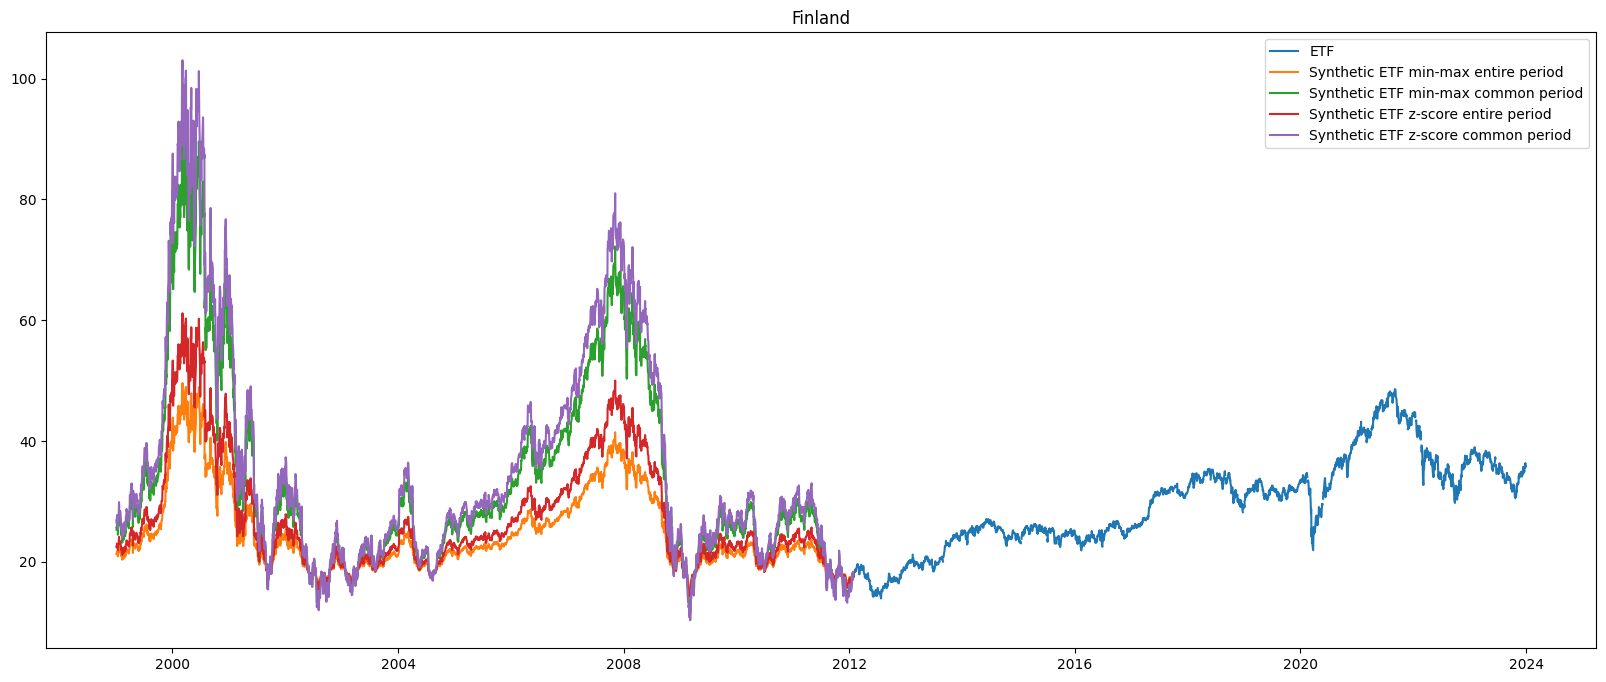

In [34]:
country = 'Finland'

plt.figure(figsize=(20,8))
plt.plot(df_etfs[country], label='ETF')
plt.plot(df_synthetic_etfs_min_max_entire_period[country], label='Synthetic ETF min-max entire period')
plt.plot(df_synthetic_etfs_min_max_common_period[country], label='Synthetic ETF min-max common period')
plt.plot(df_synthetic_etfs_z_score_entire_period[country], label='Synthetic ETF z-score entire period')
plt.plot(df_synthetic_etfs_z_score_common_period[country], label='Synthetic ETF z-score common period')
plt.title(country)
plt.legend()
plt.show()

Red line for Z-score calculated on the entire period is the most realistic with the closest gains to the original MSCI Index.

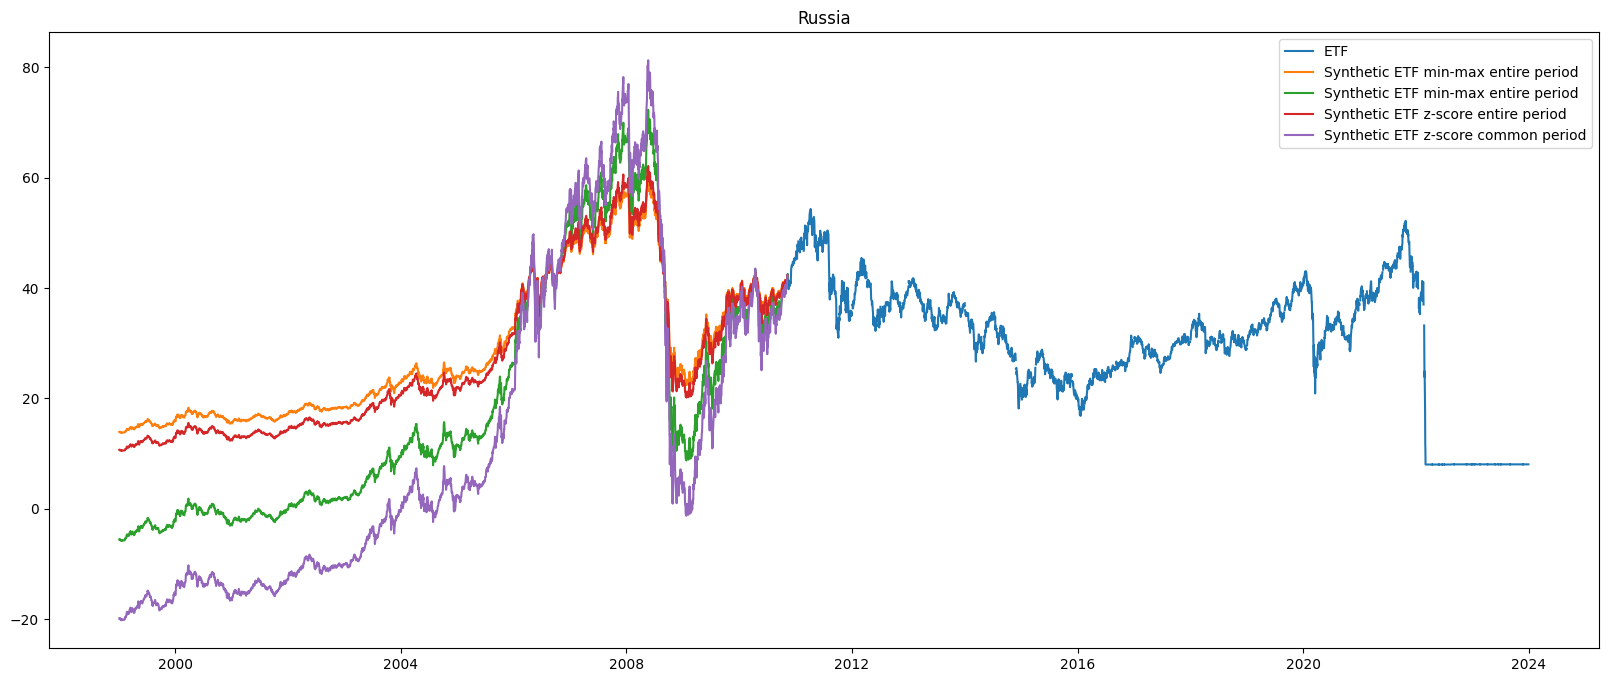

In [35]:
country = 'Russia'

plt.figure(figsize=(20,8))
plt.plot(df_etfs[country], label='ETF')
plt.plot(df_synthetic_etfs_min_max_entire_period[country], label='Synthetic ETF min-max entire period')
plt.plot(df_synthetic_etfs_min_max_common_period[country], label='Synthetic ETF min-max entire period')
plt.plot(df_synthetic_etfs_z_score_entire_period[country], label='Synthetic ETF z-score entire period')
plt.plot(df_synthetic_etfs_z_score_common_period[country], label='Synthetic ETF z-score common period')
plt.title(country)
plt.legend()
plt.show()

For Russia, standard deviation is so much bigger in period upto 2011 compared to the recent years. When normalizing using only the common period after 2011, synthetic ETF gives some negative prices what makes little financial sense.

### Sinthetic ETFs using Z-score and entire period

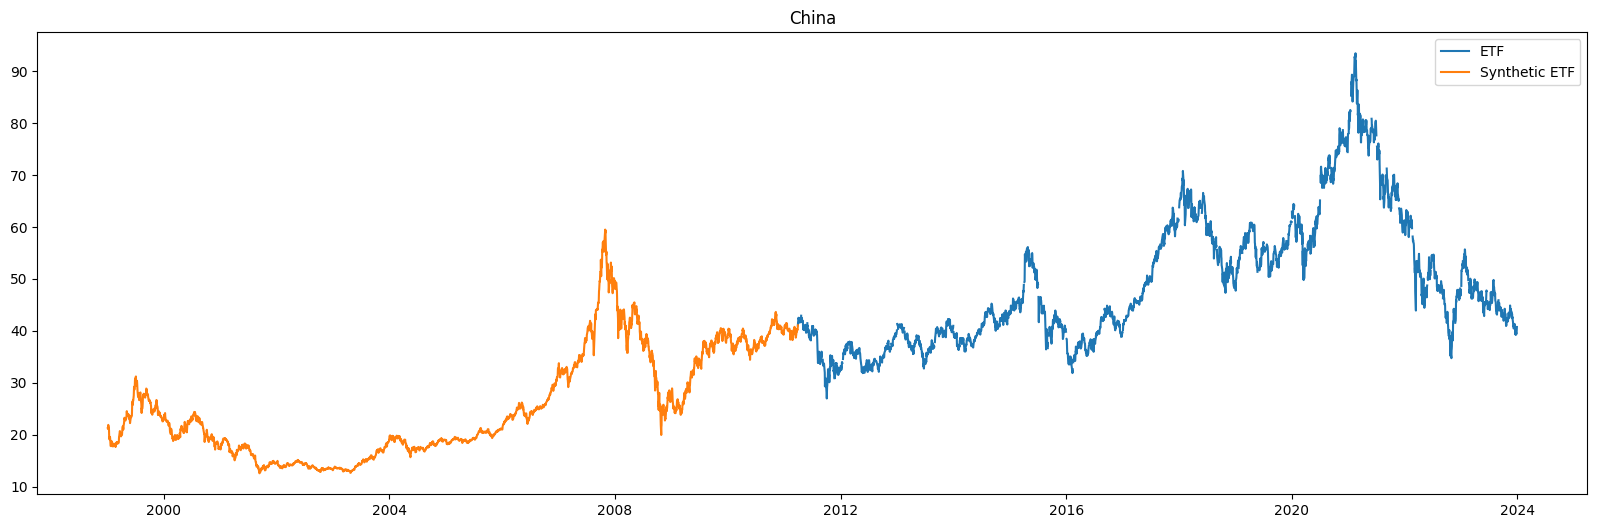

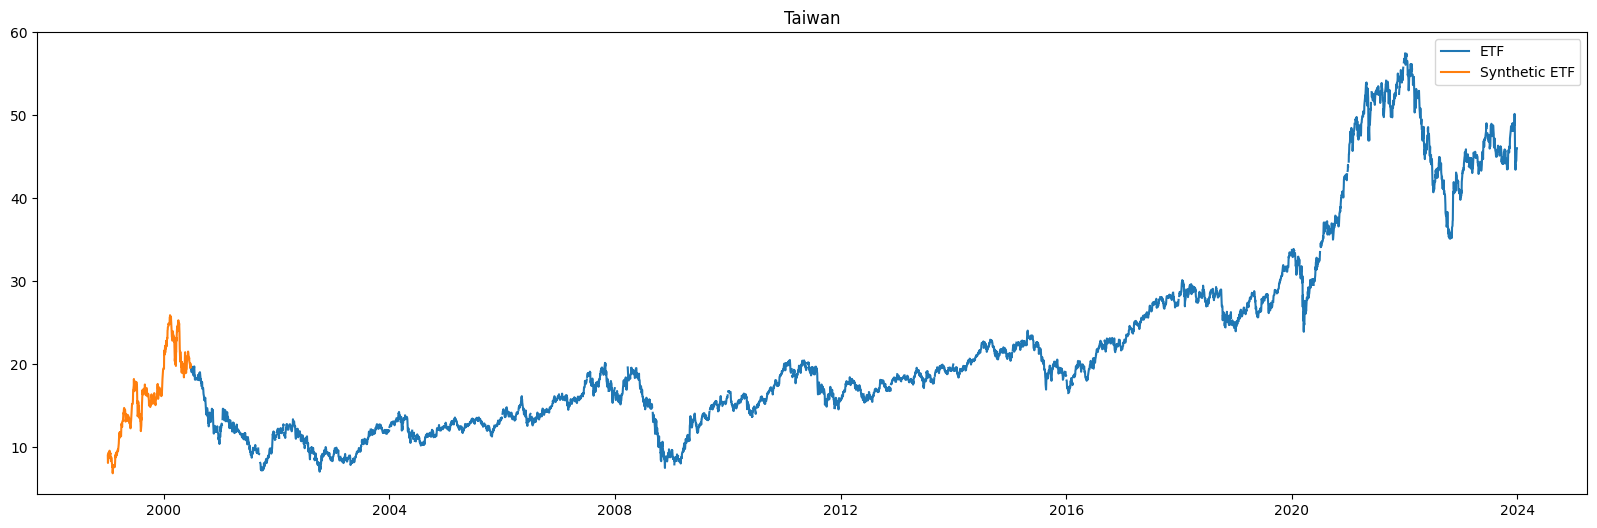

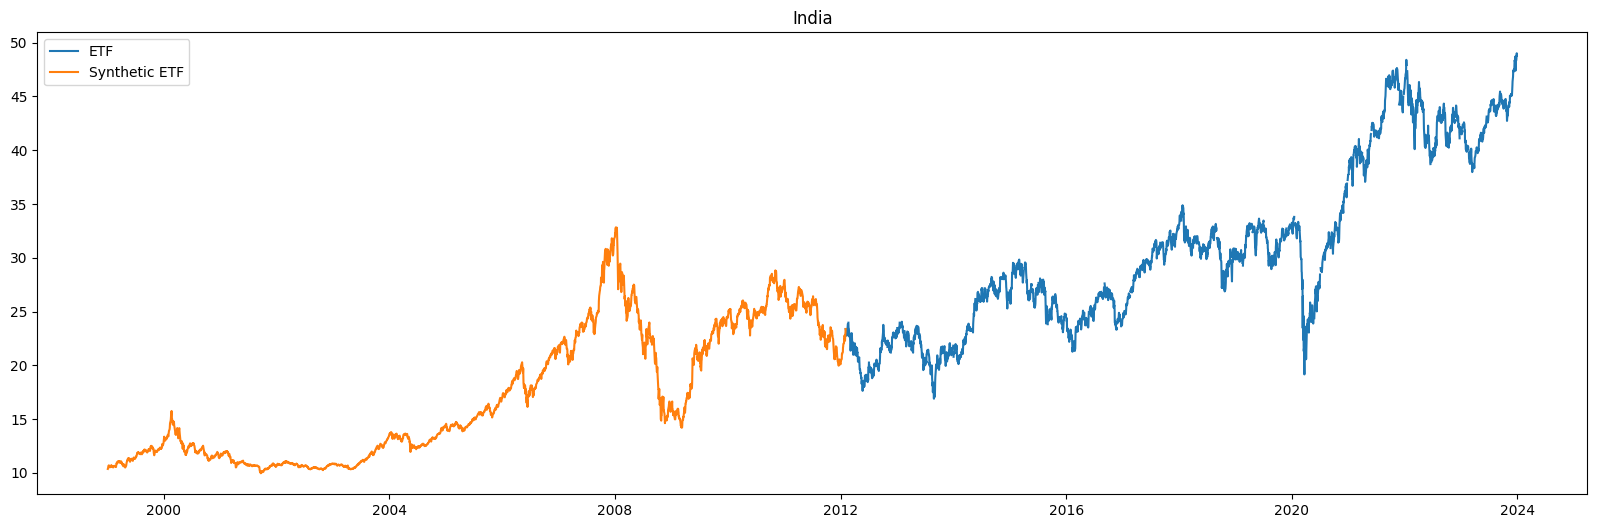

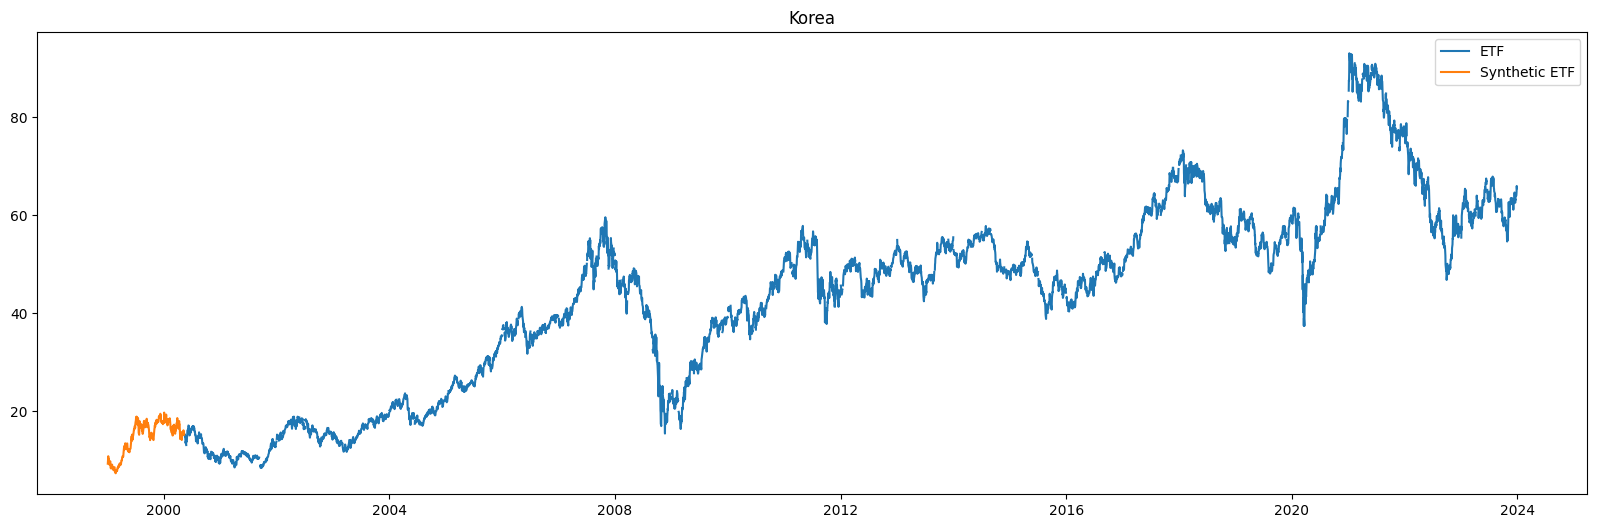

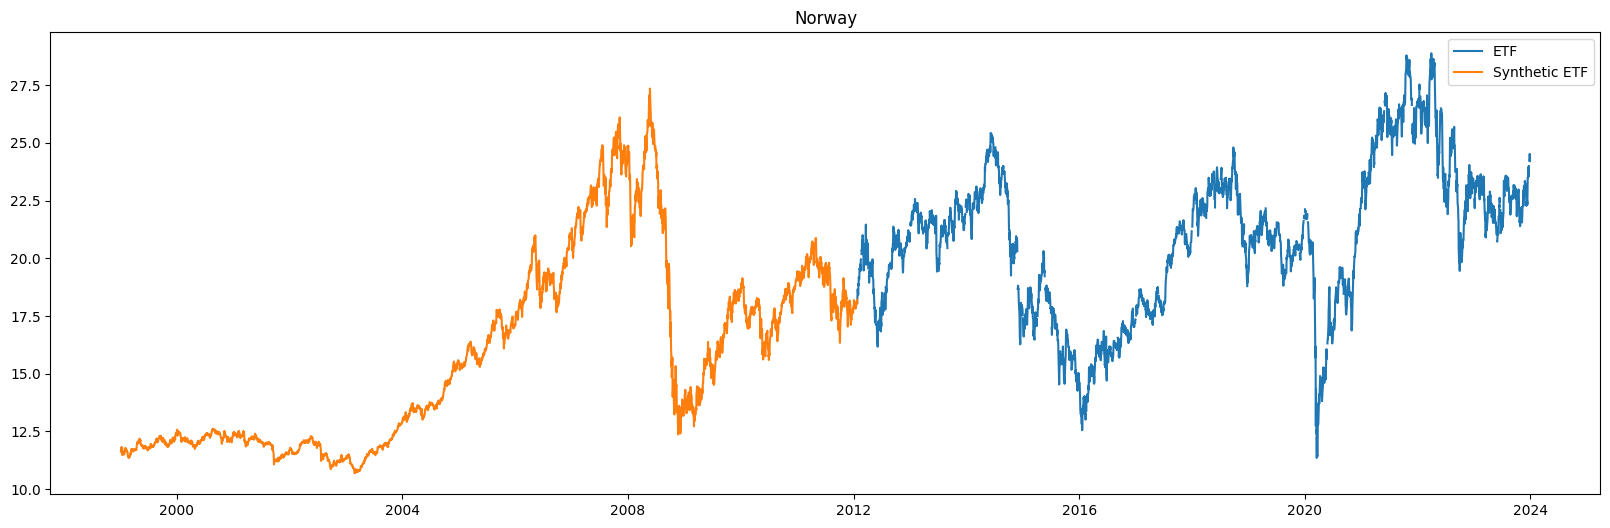

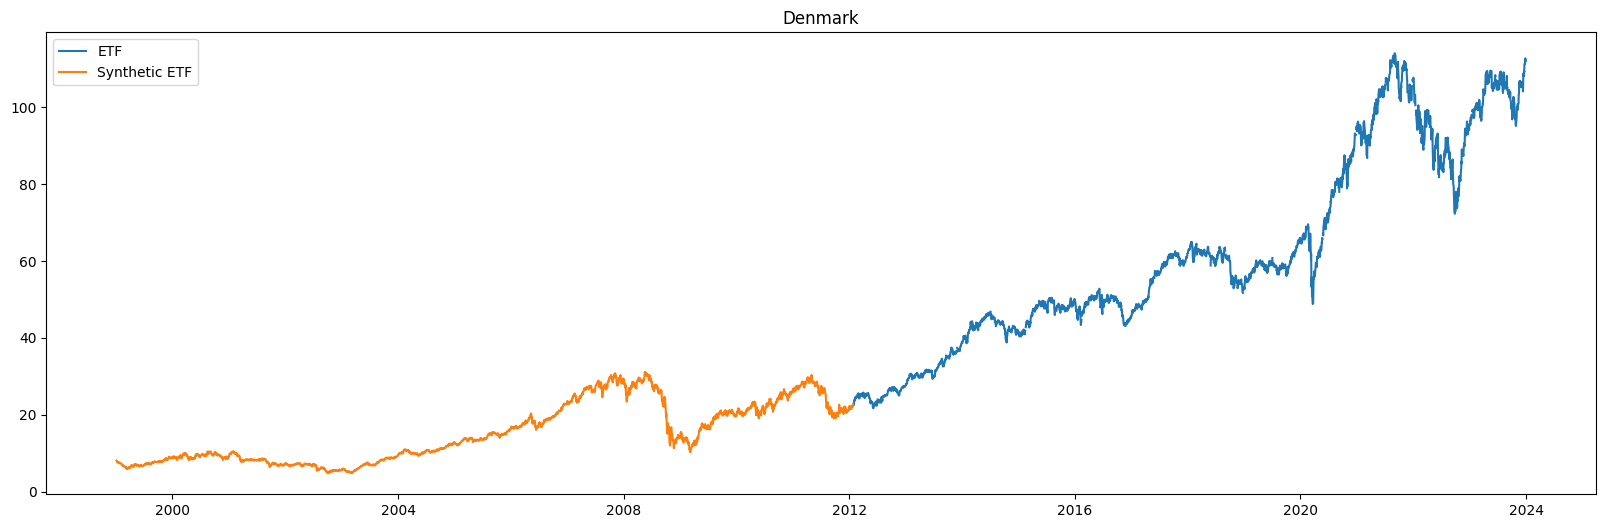

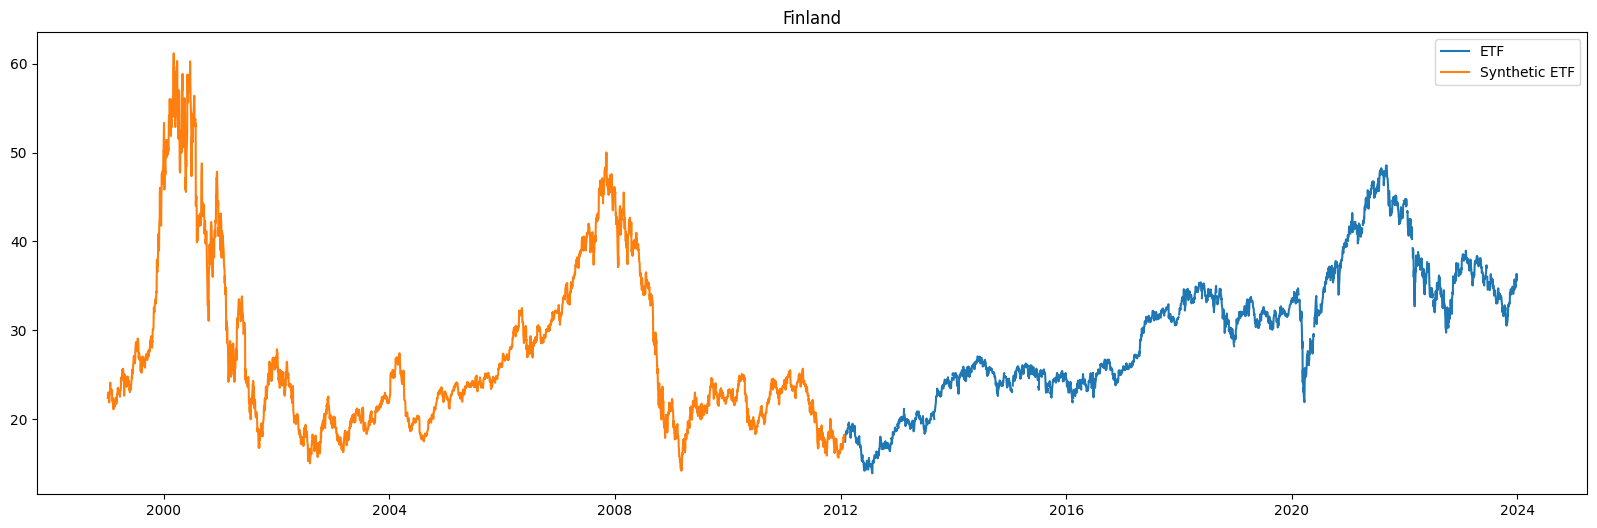

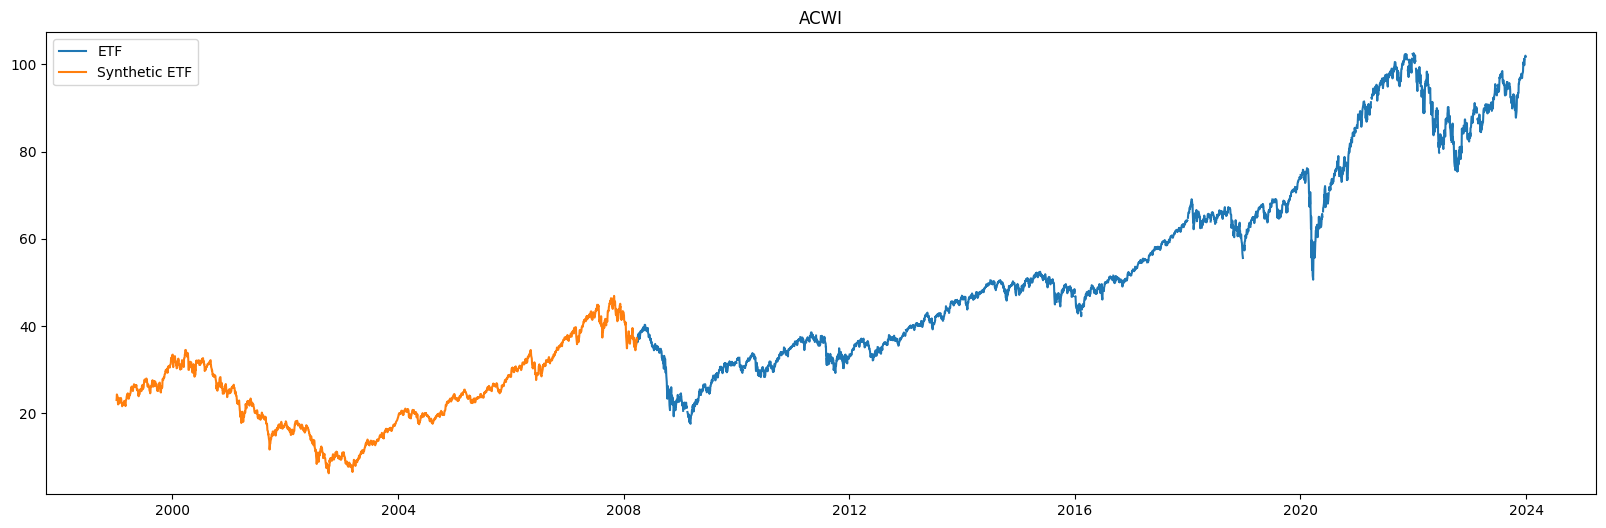

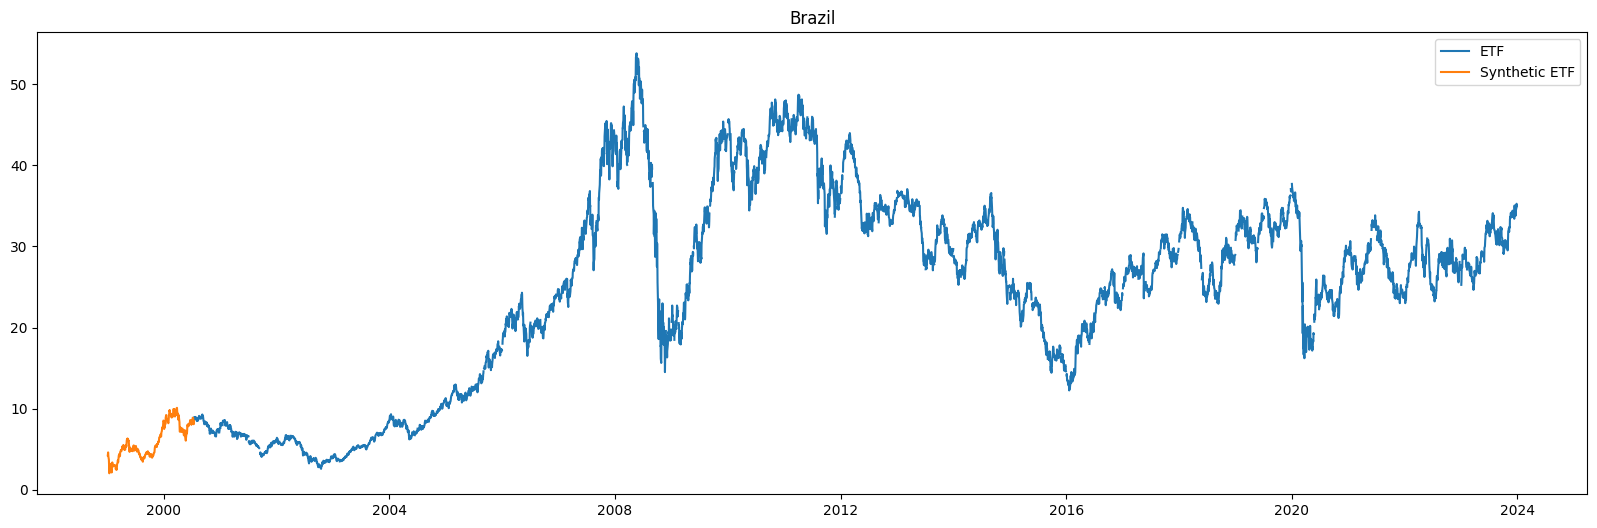

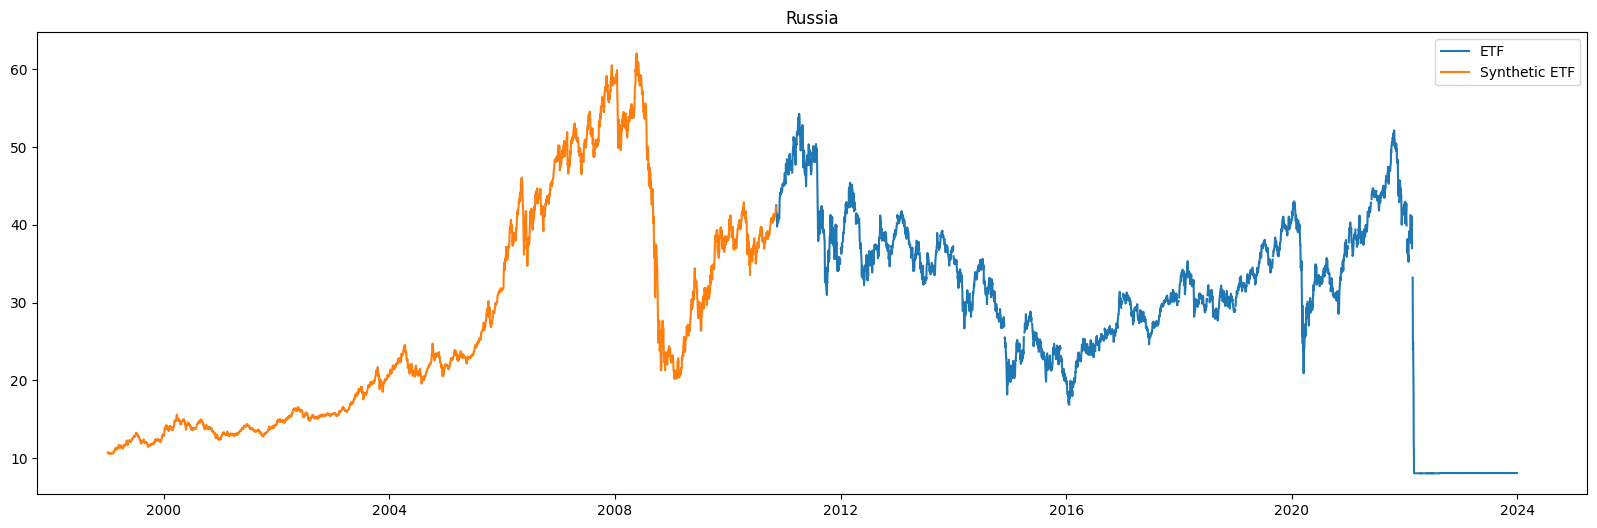

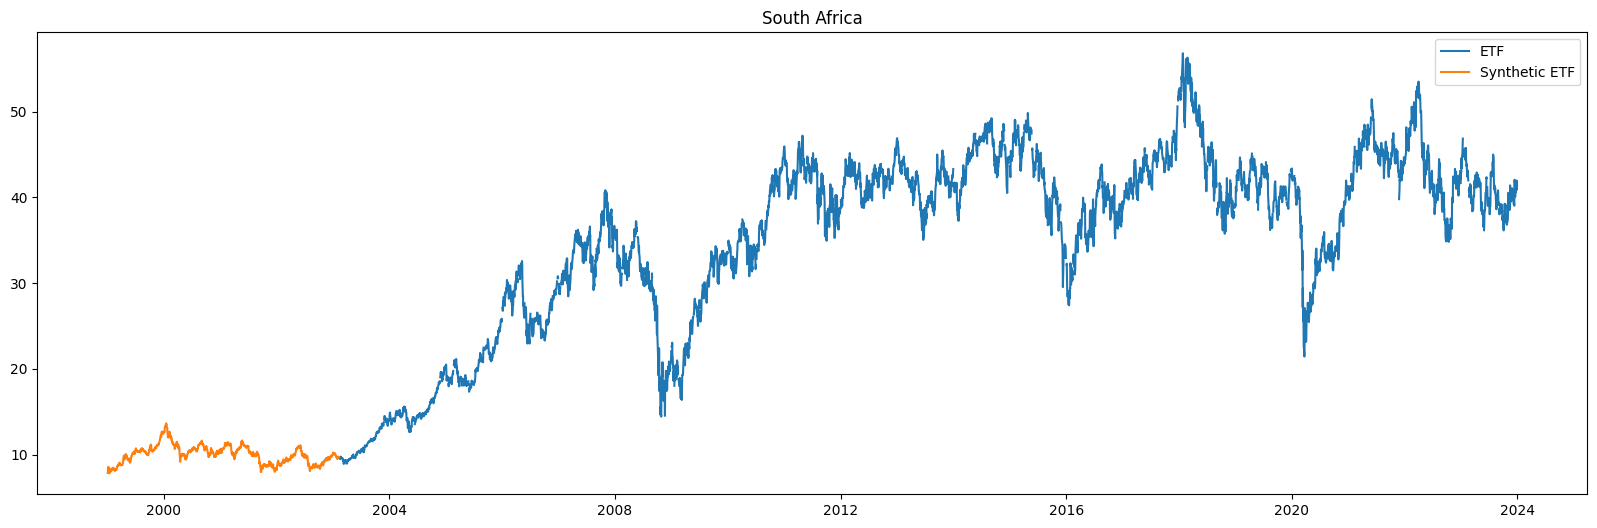

In [36]:
for country in countries:
    plt.figure(figsize=(20,6))
    plt.plot(df_etfs[country], label='ETF')
    plt.plot(df_synthetic_etfs_z_score_entire_period[country], label='Synthetic ETF')
    plt.title(country)
    plt.legend()
    plt.show()

### Save synthetic ETFs to the db

In [37]:
from SqlAlquemyInsertMarketDataHandler import SqlAlquemyInsertMarketDataHandler

In [38]:
def save_to_db(historic_data, category):
    sql_handler = SqlAlquemyInsertMarketDataHandler()

    for country in historic_data.columns:
        print(country, end='')
        values = historic_data[country].dropna()
        symbol_code = sql_handler.get_symbol_code(category, country)
        if (len(values) > 0) and symbol_code != '':
            sql_handler.delete_all_records(symbol_code)
            sql_handler.save_to_db(symbol_code, values)
        else:
            print(' - skipped')

In [39]:
save_to_db(df_synthetic_etfs_z_score_entire_period, 'Synthetic ETF in USD')

China................Inserted 3194 records for MCHI_SYN
Taiwan..Inserted 385 records for EWT_SYN
India..................Inserted 3415 records for INDA_SYN
Korea..Inserted 355 records for EWY_SYN
Norway..................Inserted 3407 records for NORW_SYN
Denmark..................Inserted 3409 records for EDEN_SYN
Finland..................Inserted 3409 records for EFNL_SYN
ACWI.............Inserted 2410 records for ACWI_SYN
Brazil..Inserted 400 records for EWZ_SYN
Russia................Inserted 3091 records for ERUS_SYN
South Africa......Inserted 1070 records for EZA_SYN
